# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2 - Ames Housing Data and Kaggle Challenge - Part 1/2

# Contents:
- [Problem Statement](#Problem-Statement)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning , Visualisation and Preprocessing](#Data-Cleaning-,-Visualisation-and-Preprocessing)
- [Kaggle challenge - Test data processing](#Kaggle-challenge---Test-data-processing)

## Problem Statement

Our client is an overseas property investment firm that specialised in purchasing existing residential housing, performing necessary cost-effective renovations and selling them to yield a better profits.

As a data scientist, our task is to build a good regression model based on the Ames housing dataset to help client to have a good prediction on the price of the house which helps them in their decision making. We also aimed to identify top features to look out for when investing in Ames residential housing such as valuable residential location and important features of the residential houses that can be cost effectively renovated to increase its value.

The given Ames housing dataset consists of 81 features for residential houses that were sold between 2006 and 2010. 

The following are the general workflow for this project: 
+ Understanding the data
+ Exploratory data analysis (EDA)
+ Data cleaning
+ Pre-processing and feature engineering
+ Modelling and evaluation
+ Conclusion and recommendation

The model will then be evaluated by two metrics - coefficient of determination (R2) and root mean square error (RMSE). The objective is to get a high R2 and a low RMSE score.

## Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from numpy import mean , std

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## Data Description

### Data Summary 

In [2]:
with open('../data/Ames Housing Description.txt', 'r') as f:
    print (f.read())

NAME: AmesHousing.txt
TYPE: Population
SIZE: 2930 observations, 82 variables
ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

SOURCES: 
Ames, Iowa Assessor’s Office 

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 81 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables.

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
     

### Data Dictionary
|Attribute|Variable Type |Dataset|Description|
|---|---|---|---|
|**Id**|*Discrete*|Ames Housing|Unique ID for each property|
|**PID**|*Nominal*|Ames Housing|Parcel identification number  - can be used with city web site for parcel review|
|**MS SubClass**|*Nominal*|Ames Housing|Identifies the type of dwelling involved in the sale|
|**MS Zoning**|*Nominal*|Ames Housing|Identifies the general zoning classification of the sale|
|**Lot Frontage**|*Continuous*|Ames Housing|Linear feet of street connected to property|
|**Lot Area**|*Continuous*|Ames Housing|Lot size in square feet|
|**Street**|*Nominal*|Ames Housing|Type of road access to property|
|**Alley**|*Nominal*|Ames Housing|Type of alley access to property|
|**Lot Shape**|*Ordinal*|Ames Housing|General shape of property|
|**Land Contour**|*Nominal*|Ames Housing|Flatness of the property|
|**Utilities**|*Ordinal*|Ames Housing|Type of utilities available|
|**Lot Config**|*Nominal*|Ames Housing|Lot configuration|
|**Land Slope**|*Ordinal*|Ames Housing|Slope of property|
|**Neighborhood**|*Nominal*|Ames Housing|Physical locations within Ames city limits (map available)|
|**Condition 1**|*Nominal*|Ames Housing|Proximity to various conditions|
|**Condition 2**|*Nominal*|Ames Housing|Proximity to various conditions (if more than one is present)|
|**Bldg Type**|*Nominal*|Ames Housing|Type of dwelling|
|**House Style**|*Nominal*|Ames Housing|Style of dwelling|
|**Overall Qual**|*Ordinal*|Ames Housing|Rates the overall material and finish of the house|
|**Overall Cond**|*Ordinal*|Ames Housing|Rates the overall condition of the house|
|**Year Built**|*Discrete*|Ames Housing|Original construction date|
|**Year Remod/Add**|*Discrete*|Ames Housing|Remodel date (same as construction date if no remodeling or additions)|
|**Roof Style**|*Nominal*|Ames Housing|Type of roof|
|**Roof Matl**|*Nominal*|Ames Housing|Roof material|
|**Exterior 1st**|*Nominal*|Ames Housing|Exterior covering on house|
|**Exterior 2nd**|*Nominal*|Ames Housing|Exterior covering on house (if more than one material)|
|**Mas Vnr Type**|*Nominal*|Ames Housing|Masonry veneer type|
|**Mas Vnr Area**|*Continuous*|Ames Housing|Masonry veneer area in square feet|
|**Exter Qual**|*Ordinal*|Ames Housing|Evaluates the quality of the material on the exterior |
|**Exter Cond**|*Ordinal*|Ames Housing|Evaluates the present condition of the material on the exterior|
|**Foundation**|*Nominal*|Ames Housing|Type of foundation|
|**Bsmt Qual**|*Ordinal*|Ames Housing|Evaluates the height of the basement|
|**Bsmt Cond**|*Ordinal*|Ames Housing|Evaluates the general condition of the basement|
|**Bsmt Exposure**|*Ordinal*|Ames Housing|Refers to walkout or garden level walls|
|**BsmtFin Type 1**|*Ordinal*|Ames Housing|Rating of basement finished area|
|**BsmtFin SF 1**|*Continuous*|Ames Housing|Type 1 finished square feet|
|**BsmtFin Type 2**|*Ordinal*|Ames Housing|Rating of basement finished area (if multiple types)|
|**BsmtFin SF 2**|*Continuous*|Ames Housing|Type 2 finished square feet|
|**Bsmt Unf SF**|*Continuous*|Ames Housing|Unfinished square feet of basement area|
|**Total Bsmt SF**|*Continuous*|Ames Housing|Total square feet of basement area|
|**Heating**|*Nominal*|Ames Housing|Type of heating|
|**Heating QC**|*Ordinal*|Ames Housing|Heating quality and condition|
|**Central Air**|*Nominal*|Ames Housing|Central air conditioning|
|**Electrical**|*Ordinal*|Ames Housing|Electrical system|
|**1st Flr SF**|*Continuous*|Ames Housing|First Floor square feet|
|**2nd Flr SF**|*Continuous*|Ames Housing|Second floor square feet|
|**Low Qual Fin SF**|*Continuous*|Ames Housing|Low quality finished square feet (all floors)|
|**Gr Liv Area**|*Continuous*|Ames Housing|Above grade (ground) living area square feet|
|**Bsmt Full Bath**|*Discrete*|Ames Housing|Basement full bathrooms|
|**Bsmt Half Bath**|*Discrete*|Ames Housing|Basement half bathrooms|
|**Full Bath**|*Discrete*|Ames Housing|Full bathrooms above grade|
|**Half Bath**|*Discrete*|Ames Housing|Half baths above grade|
|**Bedroom AbvGr**|*Discrete*|Ames Housing|Bedrooms above grade (does NOT include basement bedrooms)|
|**Kitchen AbvGr**|*Discrete*|Ames Housing|Kitchens above grade|
|**Kitchen Qual**|*Ordinal*|Ames Housing|Kitchen quality|
|**TotRms AbvGrd**|*Discrete*|Ames Housing|Total rooms above grade (does not include bathrooms)|
|**Functional**|*Ordinal*|Ames Housing|Home functionality (Assume typical unless deductions are warranted)|
|**Fireplaces**|*Discrete*|Ames Housing|Number of fireplaces|
|**Fireplace Qu**|*Ordinal*|Ames Housing|Number of fireplaces|
|**Garage Type**|*Nominal*|Ames Housing|Garage location|
|**Garage Yr Blt**|*Discrete*|Ames Housing|Year garage was built|
|**Garage Finish**|*Ordinal*|Ames Housing|Interior finish of the garage|
|**Garage Cars**|*Discrete*|Ames Housing|Size of garage in car capacity|
|**Garage Area**|*Continuous*|Ames Housing|Size of garage in square feet|
|**Garage Qual**|*Ordinal*|Ames Housing|Garage quality|
|**Garage Cond**|*Ordinal*|Ames Housing|Garage condition|
|**Paved Drive**|*Ordinal*|Ames Housing|Paved driveway|
|**Wood Deck SF**|*Continuous*|Ames Housing|Wood deck area in square feet|
|**Open Porch SF**|*Continuous*|Ames Housing|Open porch area in square feet|
|**Enclosed Porch**|*Continuous*|Ames Housing|Enclosed porch area in square feet|
|**3Ssn Porch**|*Continuous*|Ames Housing|Three season porch area in square feet|
|**Screen Porch**|*Continuous*|Ames Housing|Screen porch area in square feet|
|**Pool Area**|*Continuous*|Ames Housing|Pool area in square feet|
|**Pool QC**|*Ordinal*|Ames Housing|Pool quality|
|**Fence**|*Ordinal*|Ames Housing|Fence quality|
|**Misc Feature**|*Nominal*|Ames Housing|Miscellaneous feature not covered in other categories|
|**Misc Val**|*Continuous*|Ames Housing|Dollar-Value of miscellaneous feature|
|**Mo Sold**|*Discrete*|Ames Housing|Month Sold (MM)|
|**Yr Sold**|*Discrete*|Ames Housing|Year Sold (YYYY)|
|**Sale Type**|*Nominal*|Ames Housing|Type of sale|
|**SalePrice**|*Continuous*|Ames Housing|Sale price $$ (target)|

## Import Train Dataset

In [3]:
train = pd.read_csv('../data/train.csv')

## Exploratory Data Analysis

In [4]:
train.shape

(2051, 81)

In [5]:
train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

In [6]:
# standardise column name
train.columns = train.columns.str.lower().str.replace(' ', '_')

In [7]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
pd.set_option('display.max_rows', 2051)
train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

<AxesSubplot:>

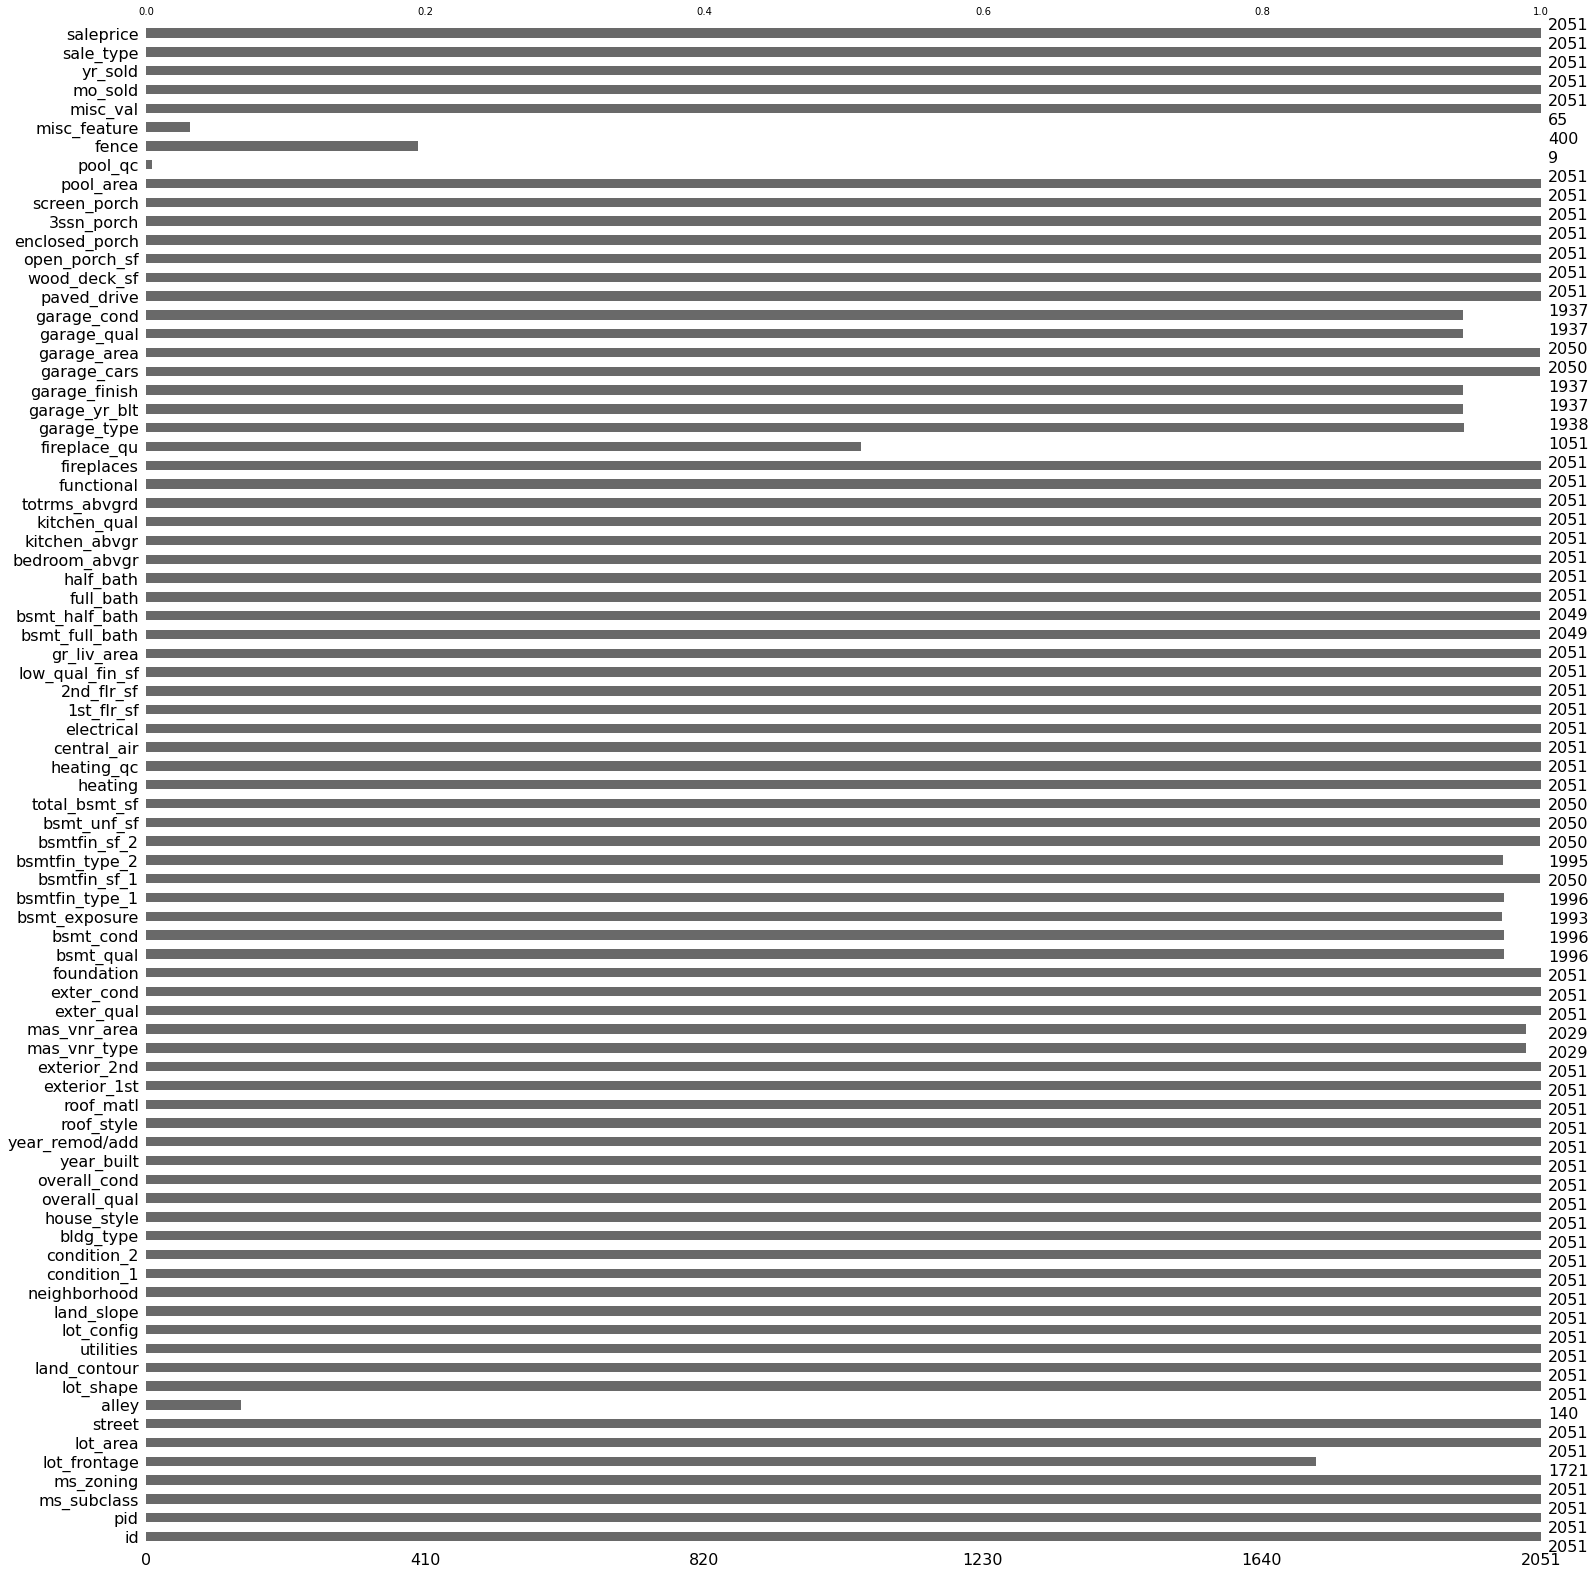

In [10]:
# To check for missing data using missingno 
msno.bar(train)

#### Remarks: 
+ There are missing values in the train dataset 
+ There is 3 type of data : object, float64 and int64

## Data Cleaning , Visualisation and Preprocessing

#### To find out the total number of missing train data: 

In [11]:
# Finding numbers, % and dtypes of missing data:
missing_value_cnt = train.isnull().sum()
percentage = 100 * train.isnull().sum() / len(train)
dtypes=train.dtypes
missing_values_table = pd.concat([missing_value_cnt, percentage,dtypes], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 
                                                       1 : 'Percentage',
                                                        2: 'dtypes'})
missing_values_table = missing_values_table[
    missing_values_table.iloc[:,1] != 0].sort_values('Percentage', ascending=False).round(1)
missing_values_table

Missing Values  Percentage   dtypes
pool_qc                   2042        99.6   object
misc_feature              1986        96.8   object
alley                     1911        93.2   object
fence                     1651        80.5   object
fireplace_qu              1000        48.8   object
lot_frontage               330        16.1  float64
garage_yr_blt              114         5.6  float64
garage_cond                114         5.6   object
garage_qual                114         5.6   object
garage_finish              114         5.6   object
garage_type                113         5.5   object
bsmt_exposure               58         2.8   object
bsmtfin_type_2              56         2.7   object
bsmt_cond                   55         2.7   object
bsmt_qual                   55         2.7   object
bsmtfin_type_1              55         2.7   object
mas_vnr_area                22         1.1  float64
mas_vnr_type                22         1.1   object
bsmt_half_bath               2         0.1  float64
bsmt_full_bath               2         0.1  float64
total_bsmt_sf                1         0.0  float64
bsmt_unf_sf                  1         0.0  float64
bsmtfin_sf_2                 1         0.0  float64
garage_cars                  1         0.0  float64
garage_area                  1         0.0  float64
bsmtfin_sf_1                 1         0.0  float64

The table shows the number of missing data and its percentage and dtype in the train dataset.

In [12]:
df = train.copy()

### Handling of data - split into Categorical and Numerical 

#### Categorical Data

In [13]:
df1 = df.select_dtypes(include=['object'])

In [14]:
df1.head()

ms_zoning street alley lot_shape land_contour utilities lot_config  \
0        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
1        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
2        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
3        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
4        RL   Pave   NaN       IR1          Lvl    AllPub     Inside   

  land_slope neighborhood condition_1  ... fireplace_qu garage_type  \
0        Gtl       Sawyer        RRAe  ...          NaN      Attchd   
1        Gtl      SawyerW        Norm  ...           TA      Attchd   
2        Gtl        NAmes        Norm  ...          NaN      Detchd   
3        Gtl       Timber        Norm  ...          NaN     BuiltIn   
4        Gtl      SawyerW        Norm  ...          NaN      Detchd   

  garage_finish garage_qual garage_cond paved_drive pool_qc fence  \
0           RFn          TA          TA           Y     NaN   NaN   
1           RFn          TA          TA           Y     NaN   NaN   
2           Unf          TA          TA           Y     NaN   NaN   
3           Fin          TA          TA           Y     NaN   NaN   
4           Unf          TA          TA           N     NaN   NaN   

  misc_feature sale_type  
0          NaN       WD   
1          NaN       WD   
2          NaN       WD   
3          NaN       WD   
4          NaN       WD   

[5 rows x 42 columns]

In [15]:
df1.columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

#### To investigate the relationship between Categorical data and Saleprice

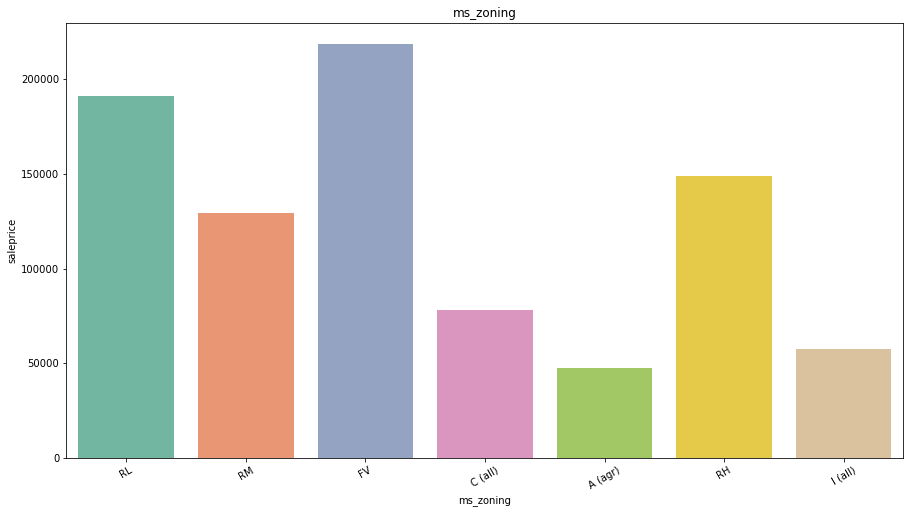

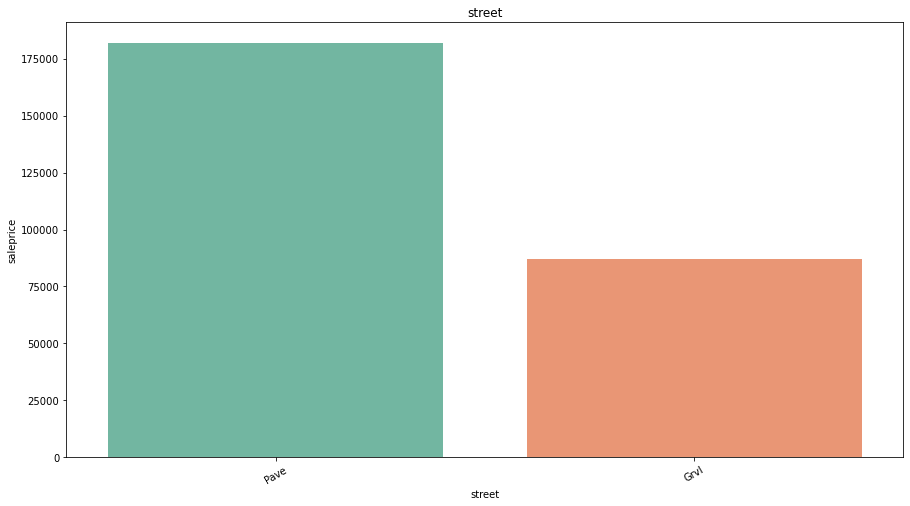

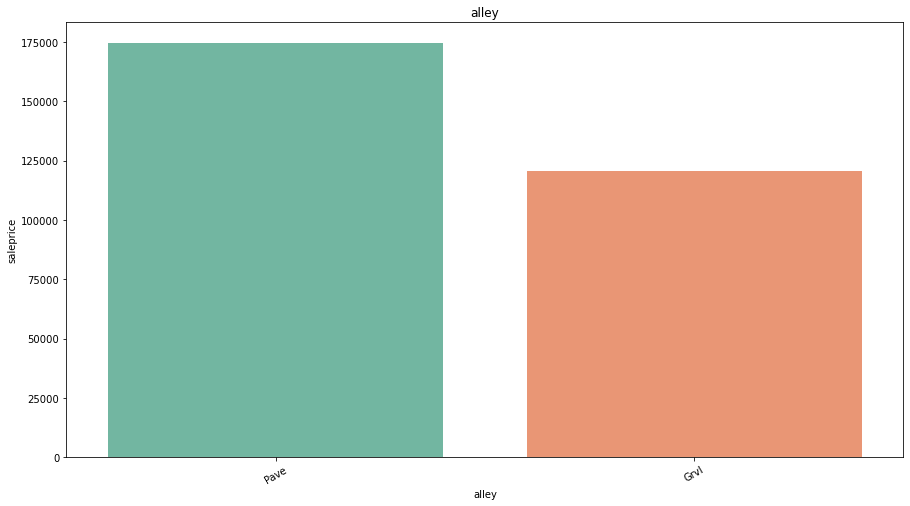

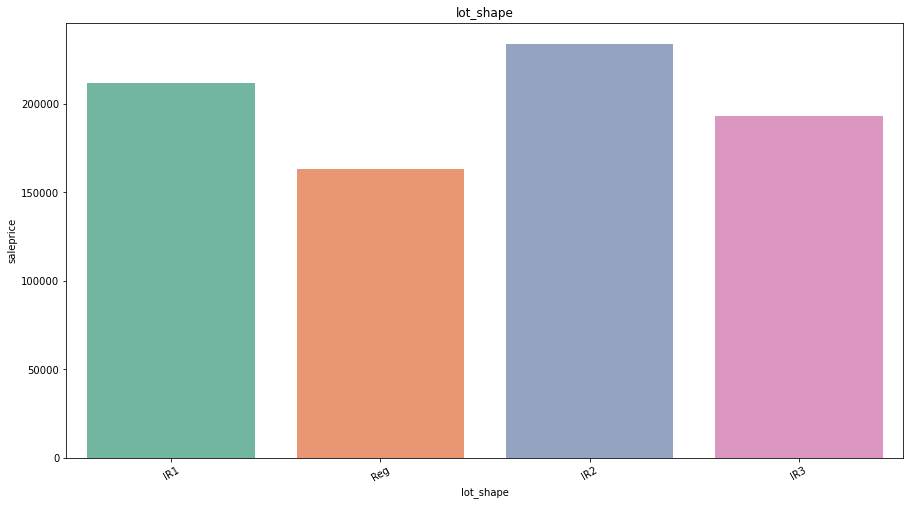

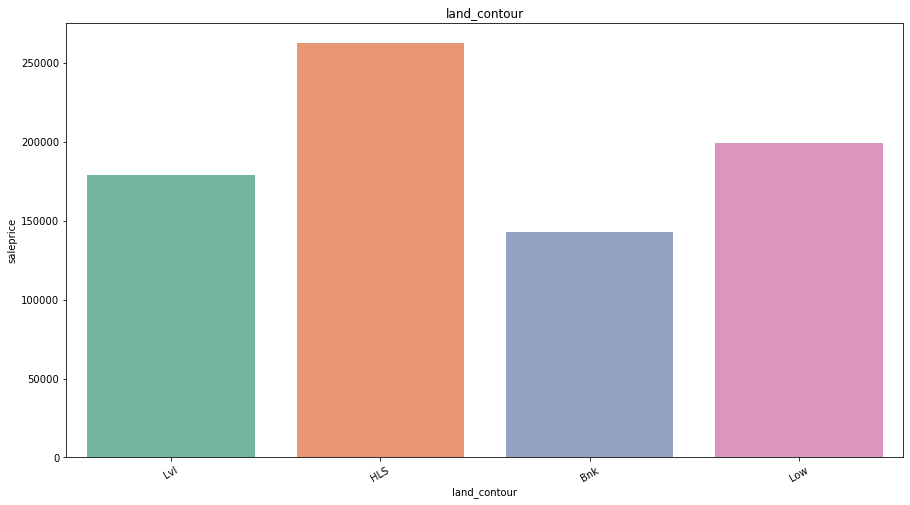

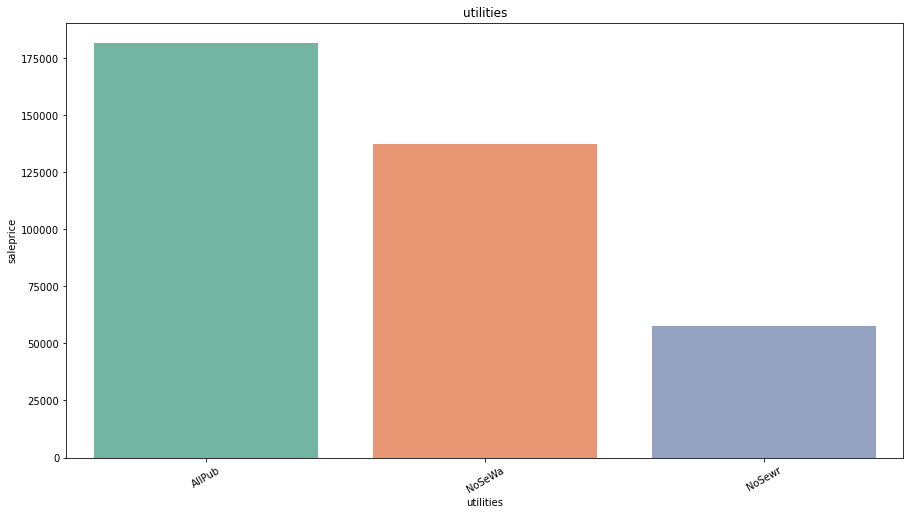

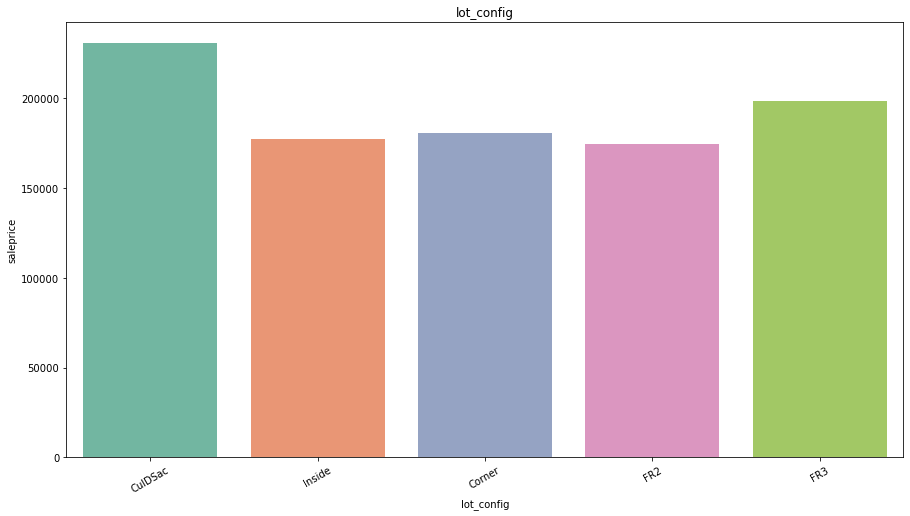

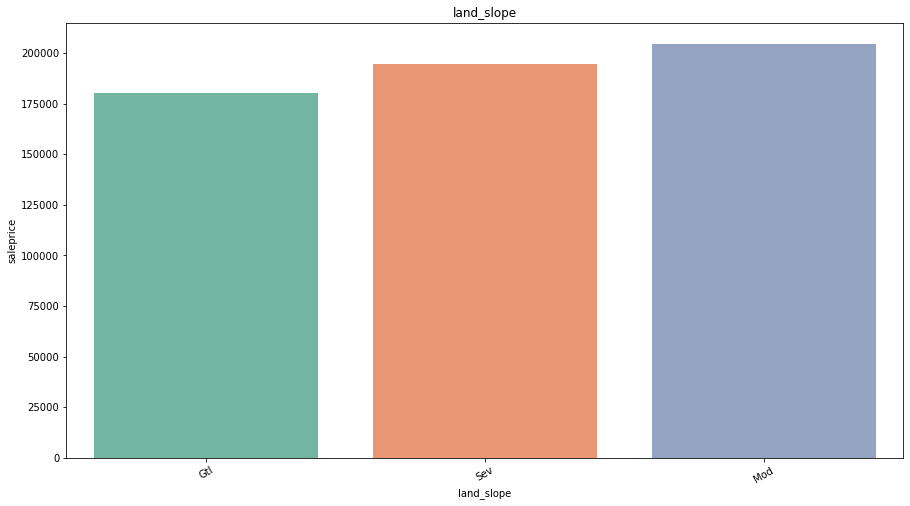

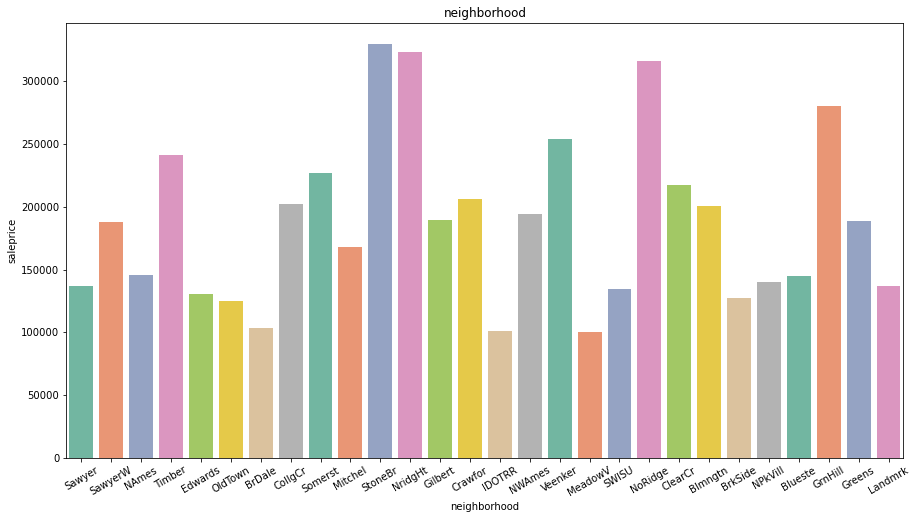

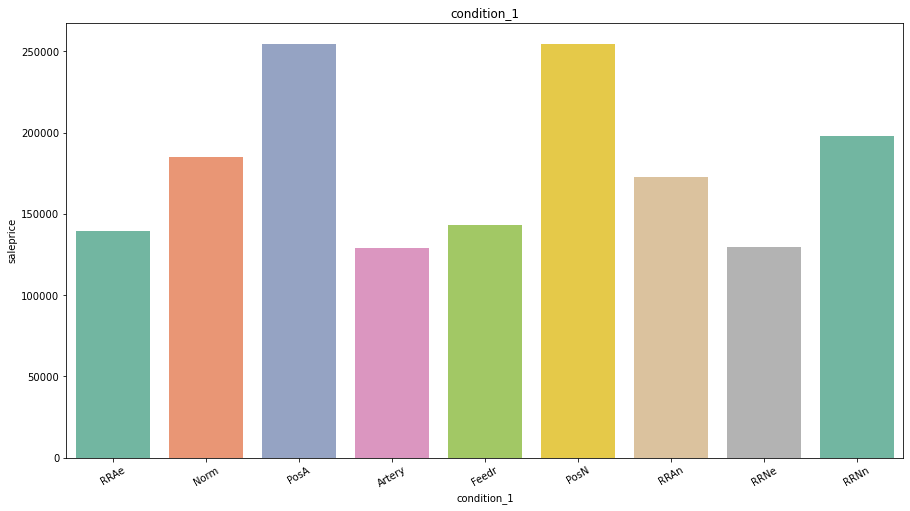

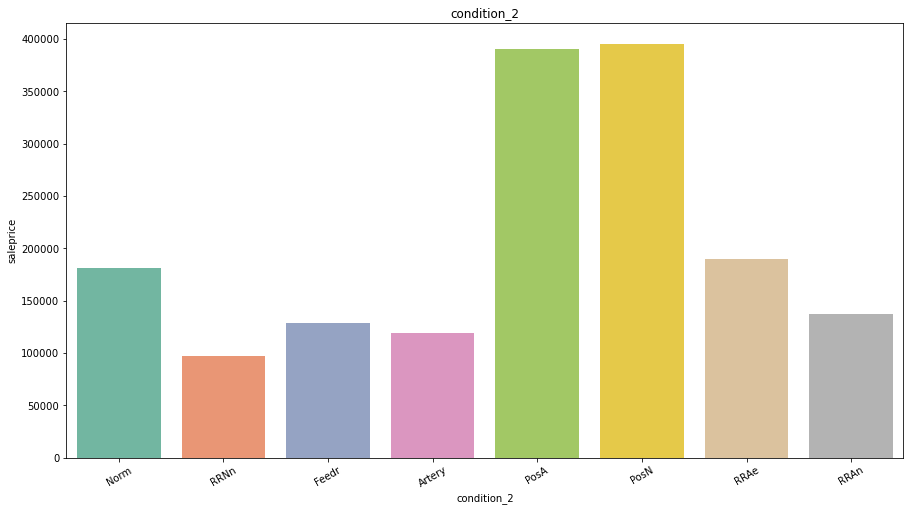

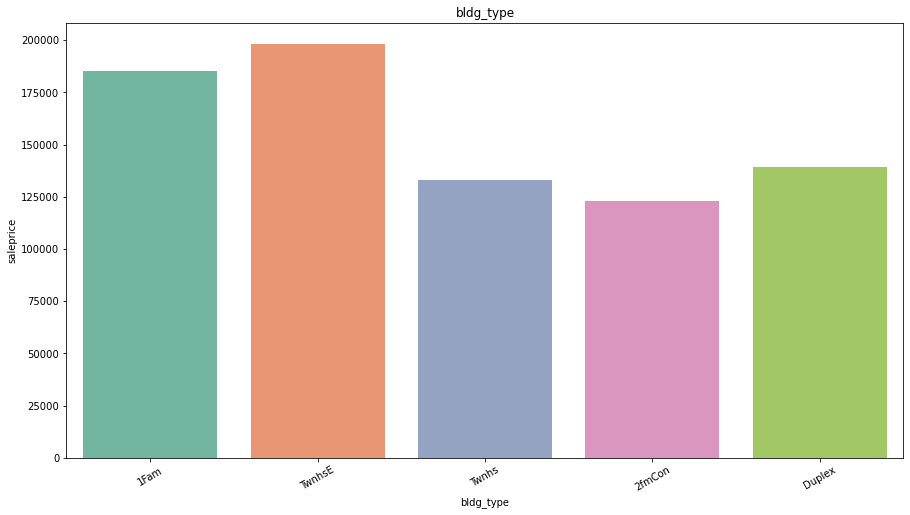

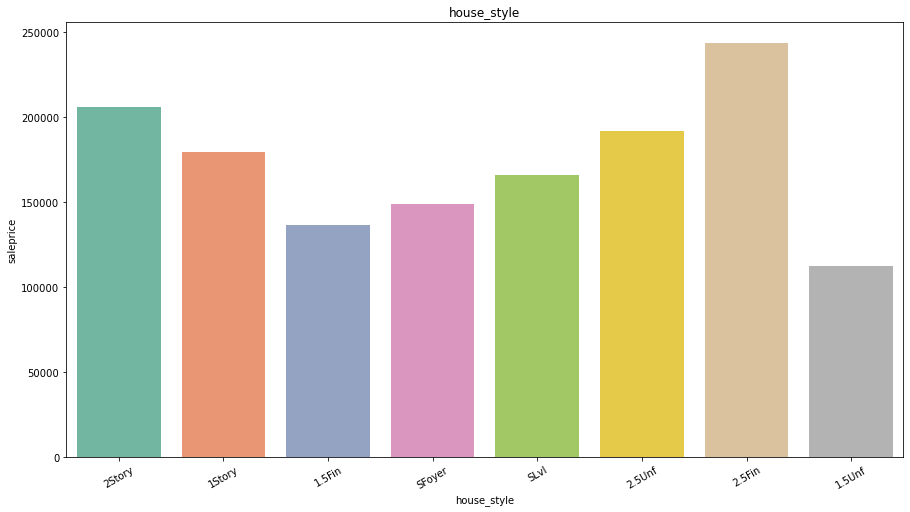

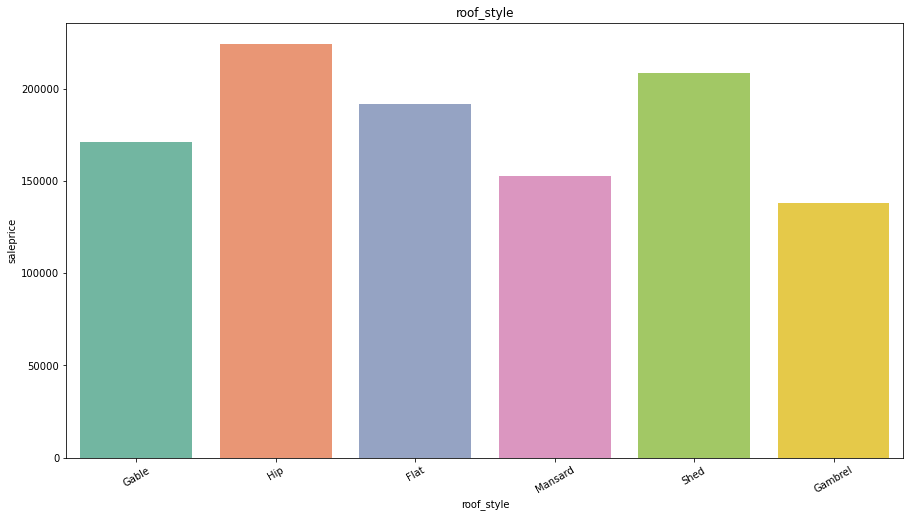

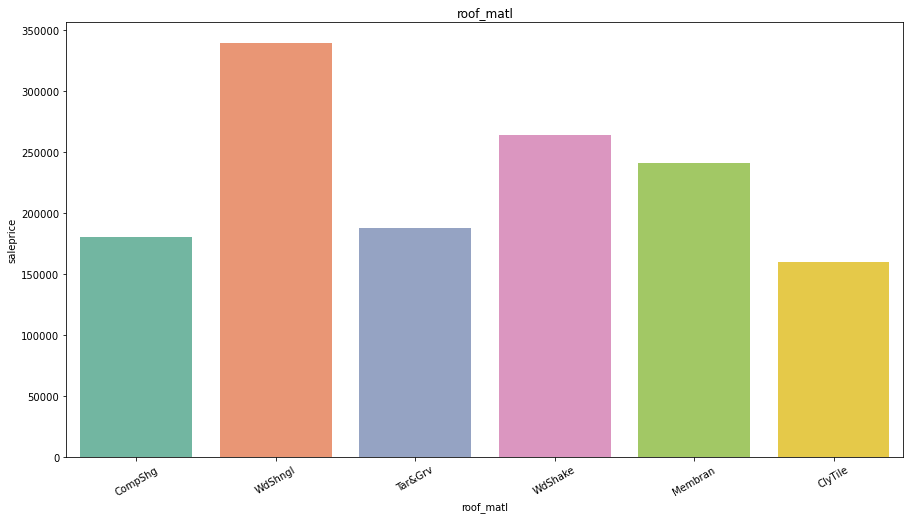

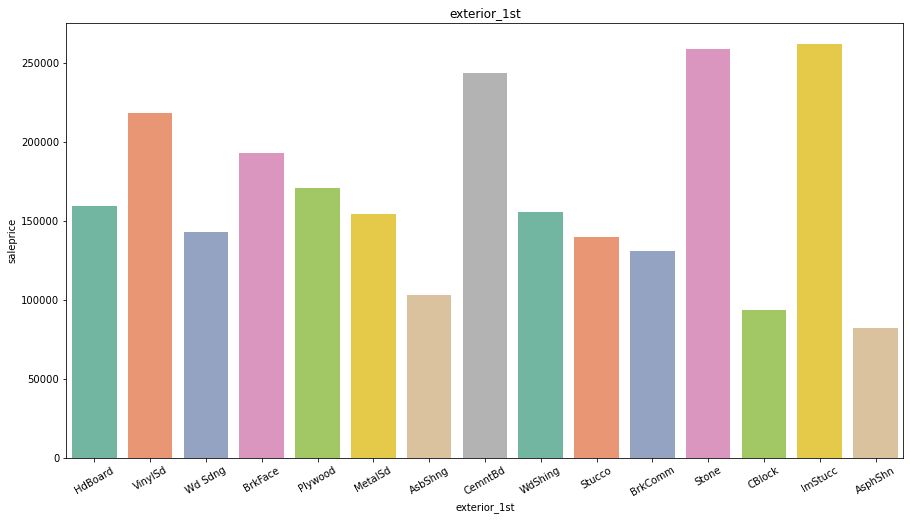

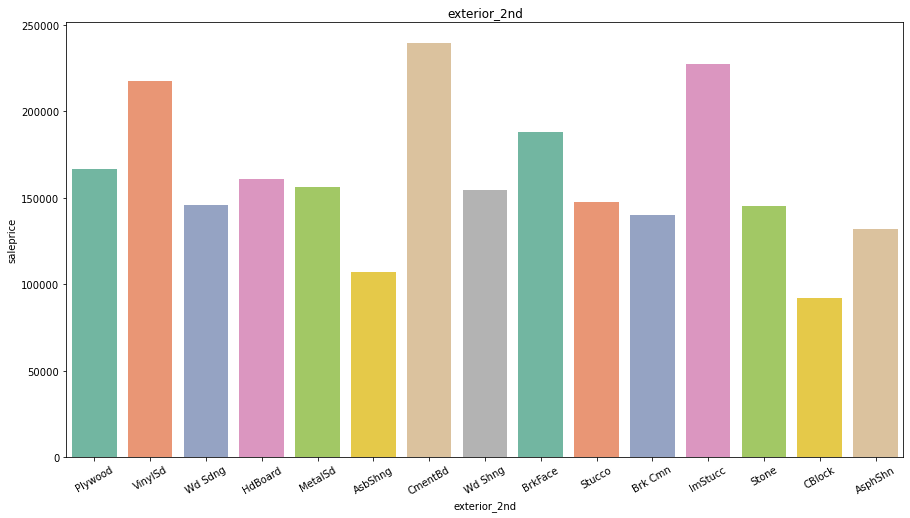

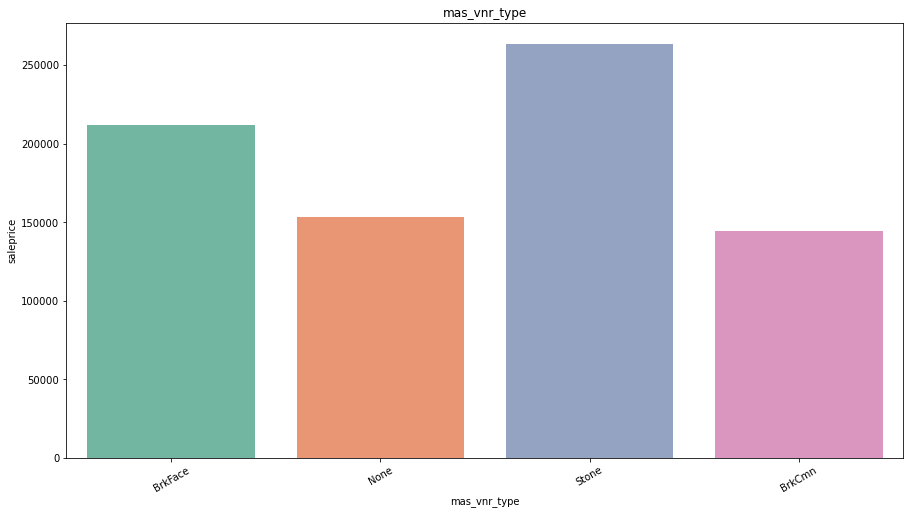

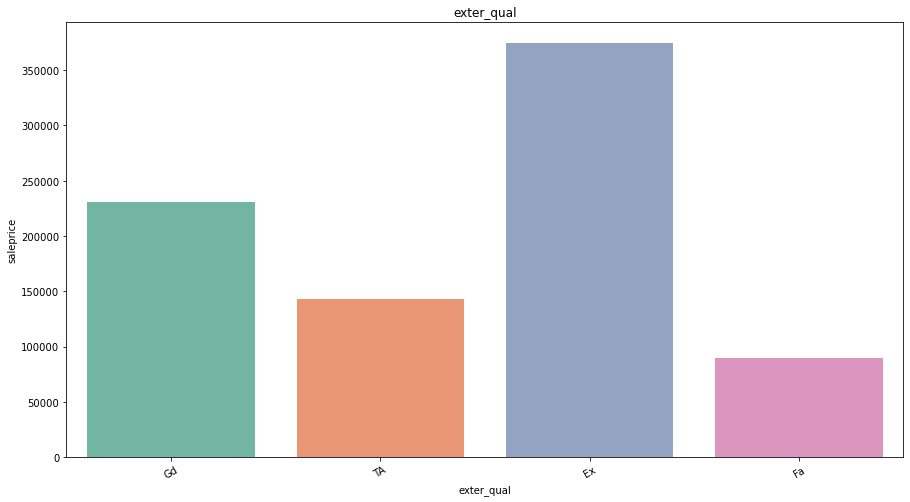

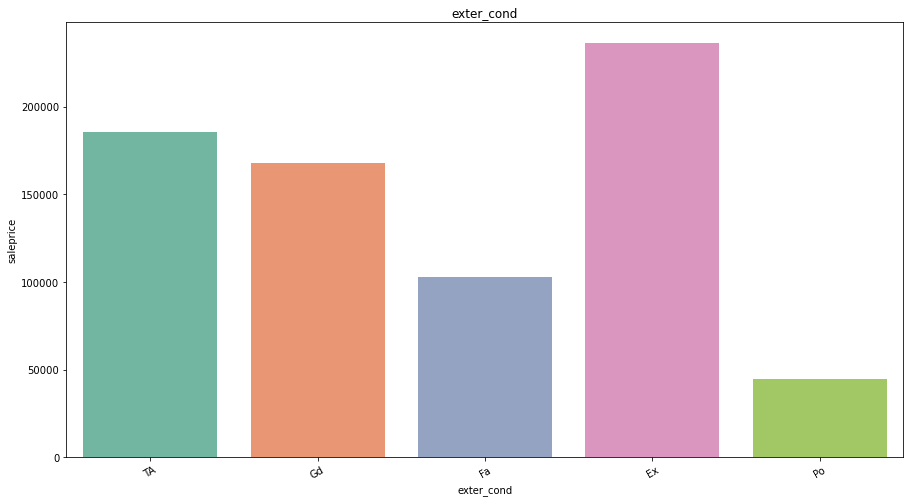

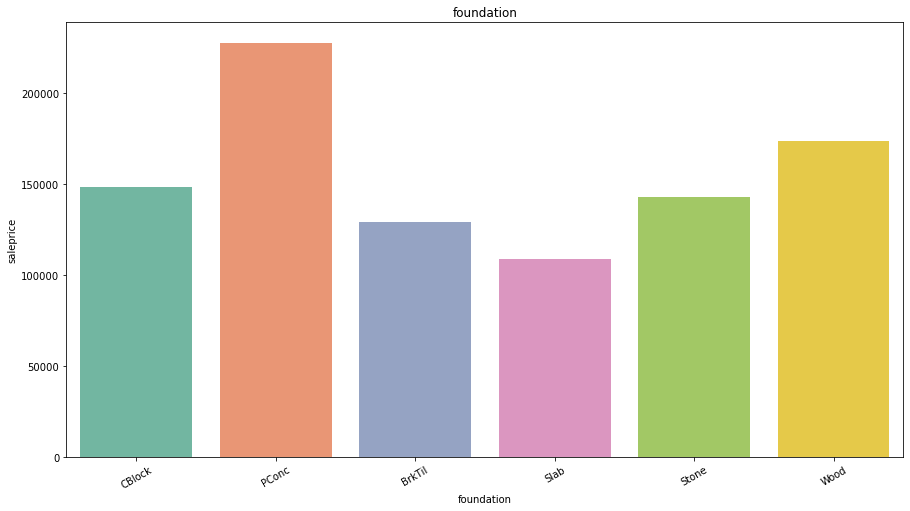

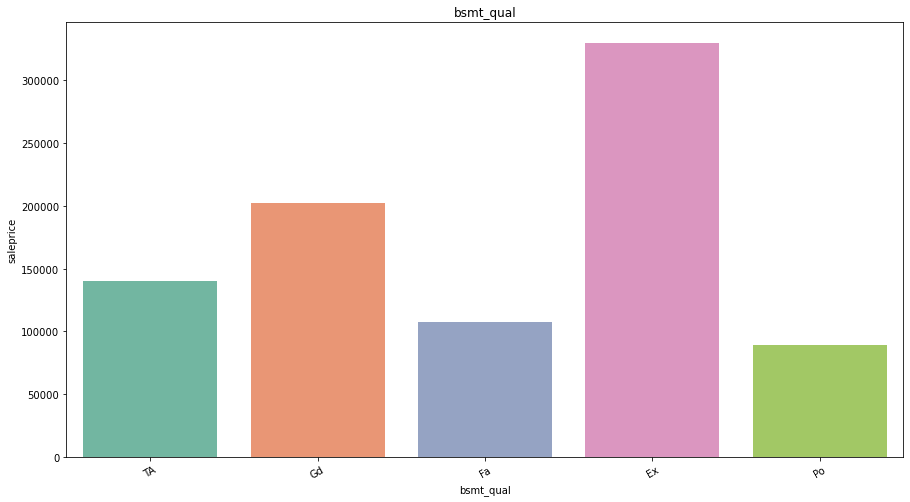

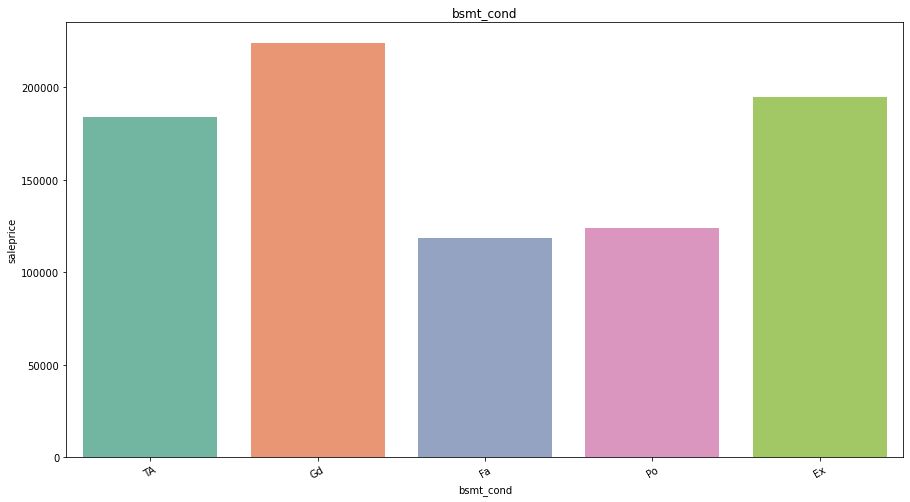

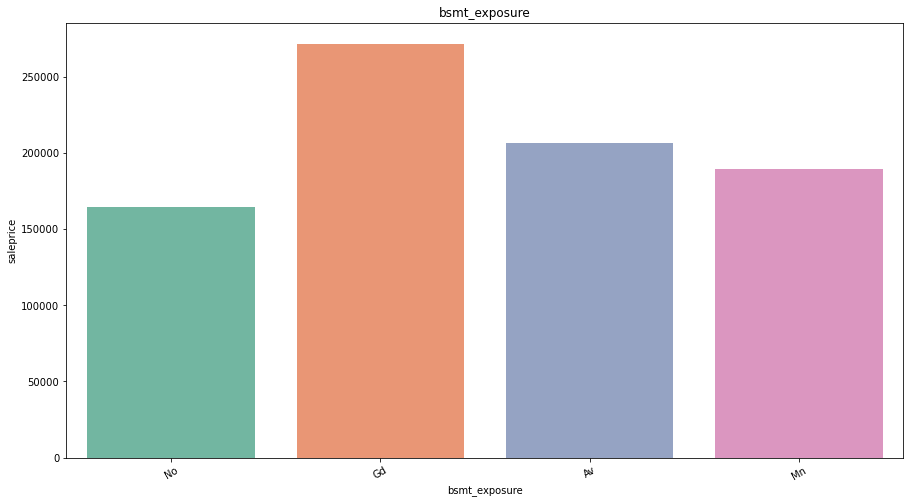

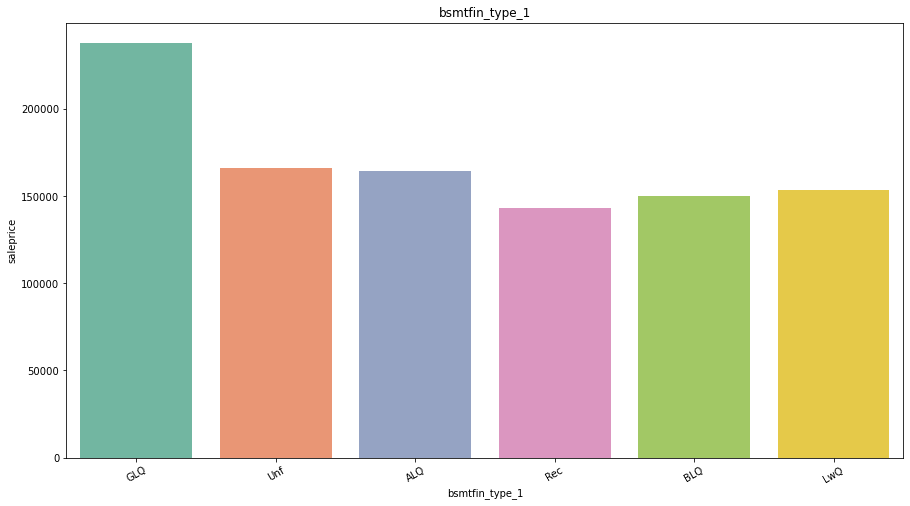

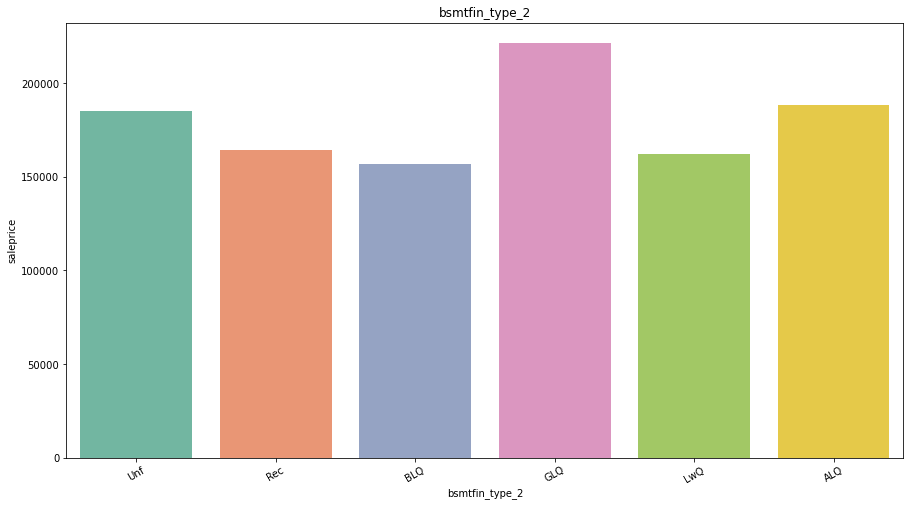

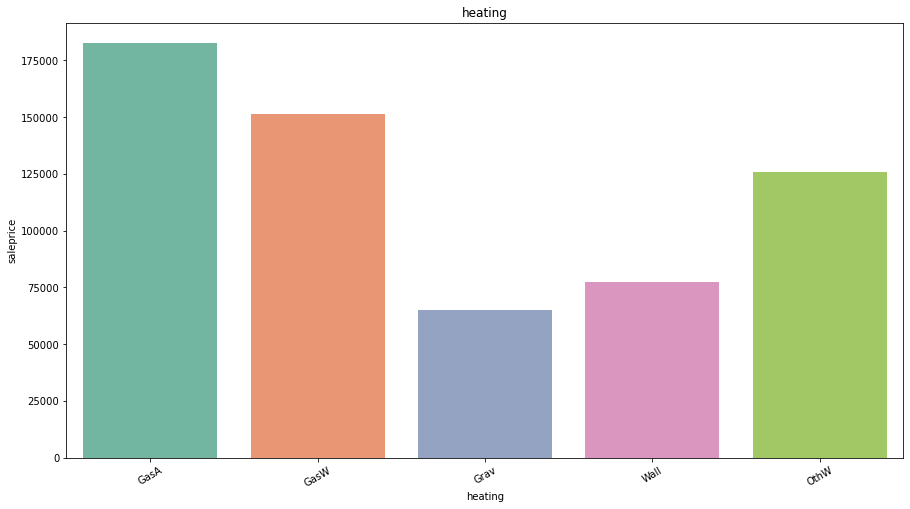

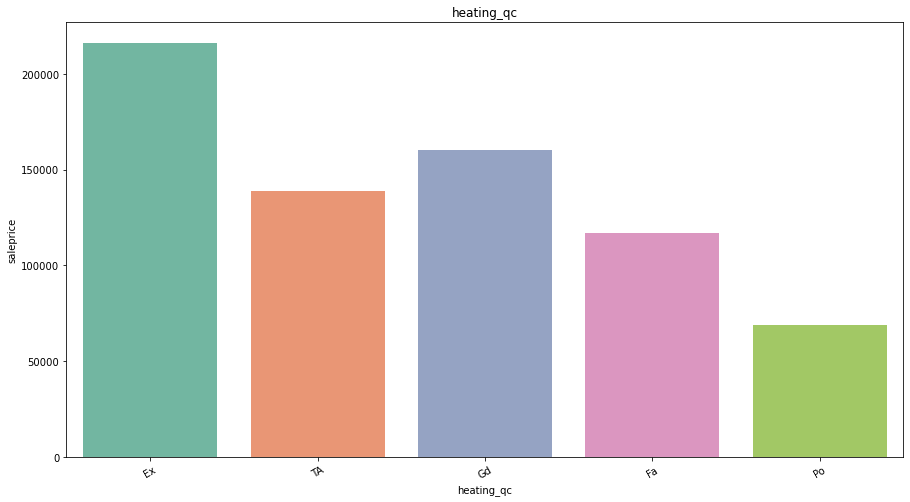

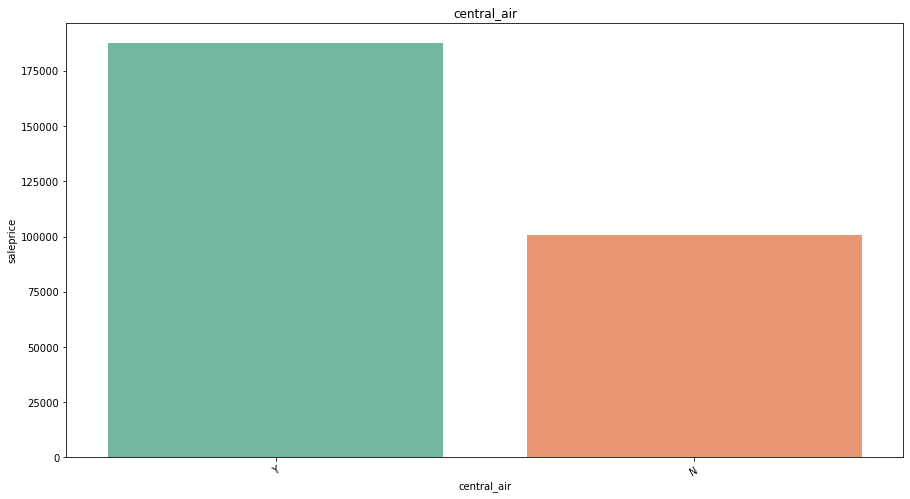

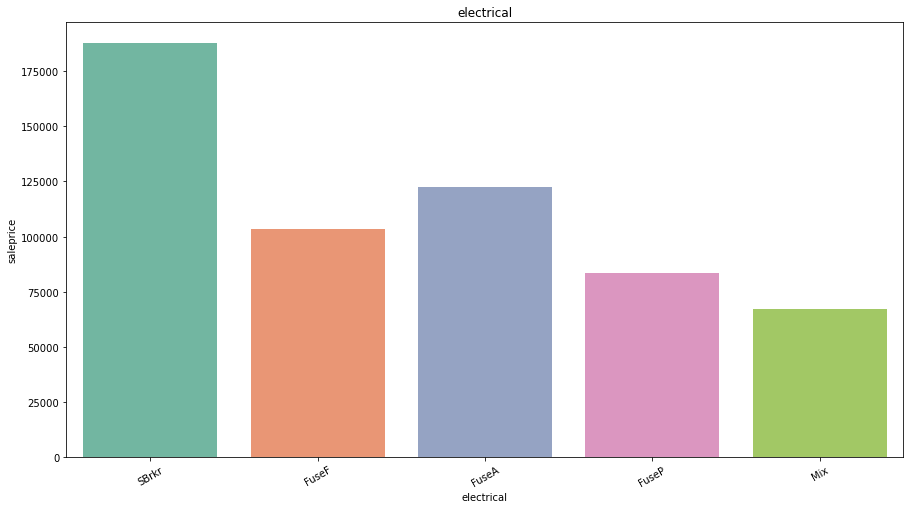

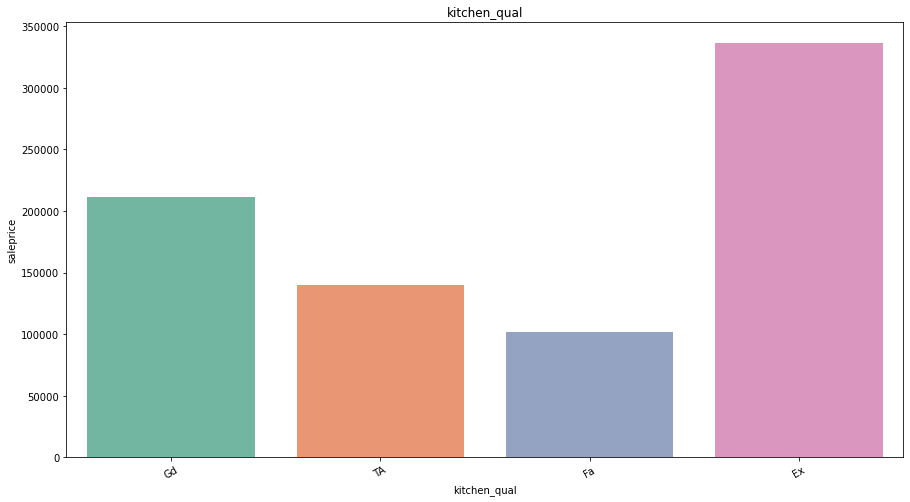

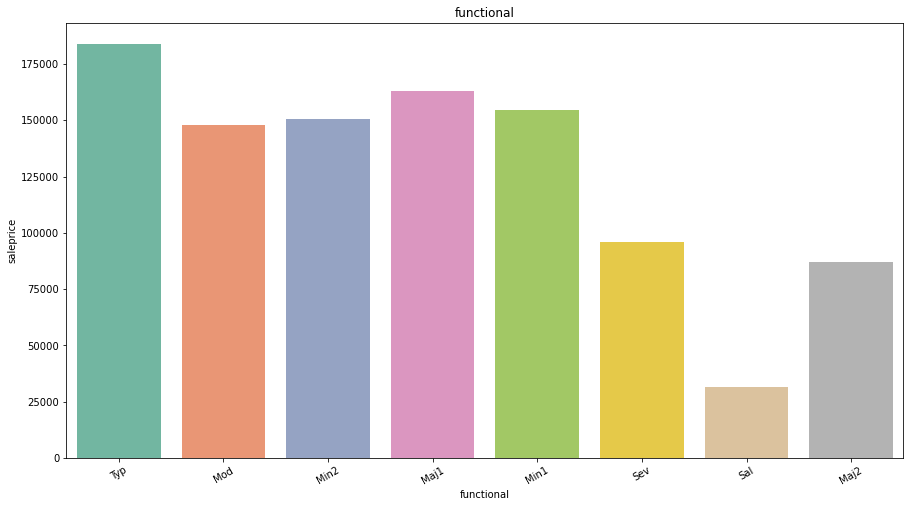

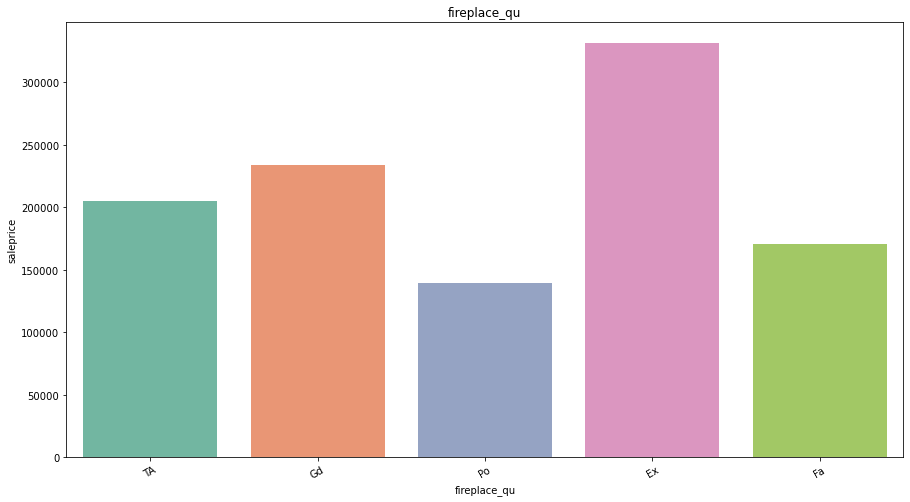

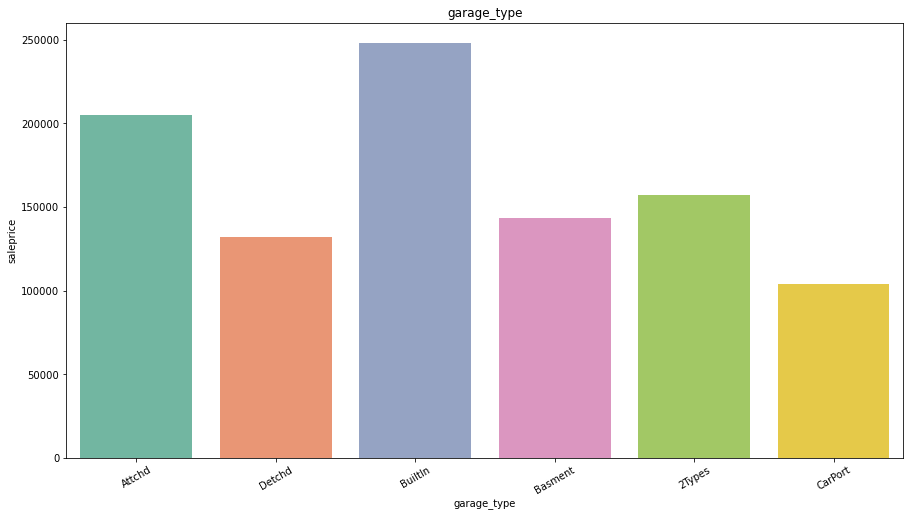

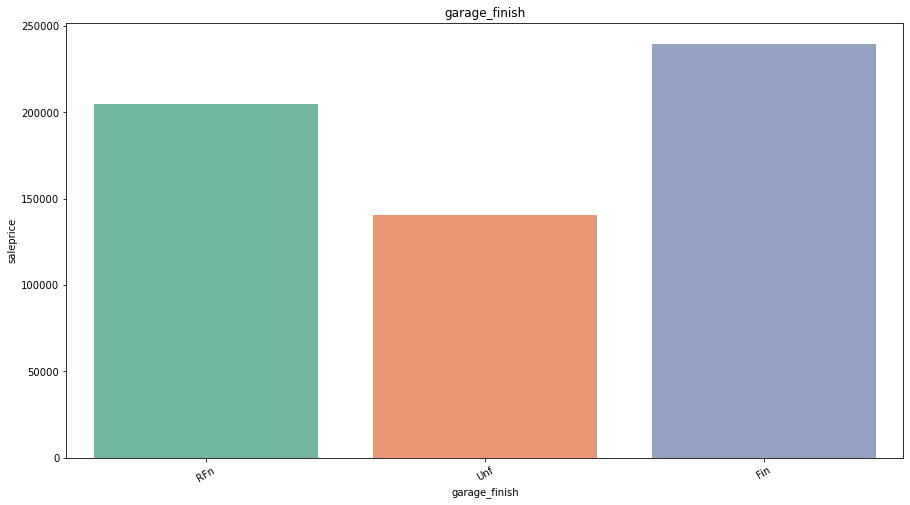

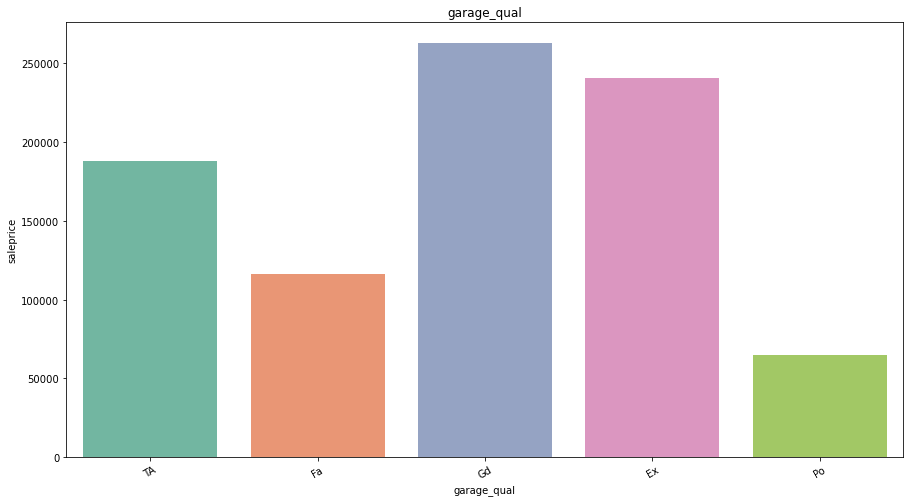

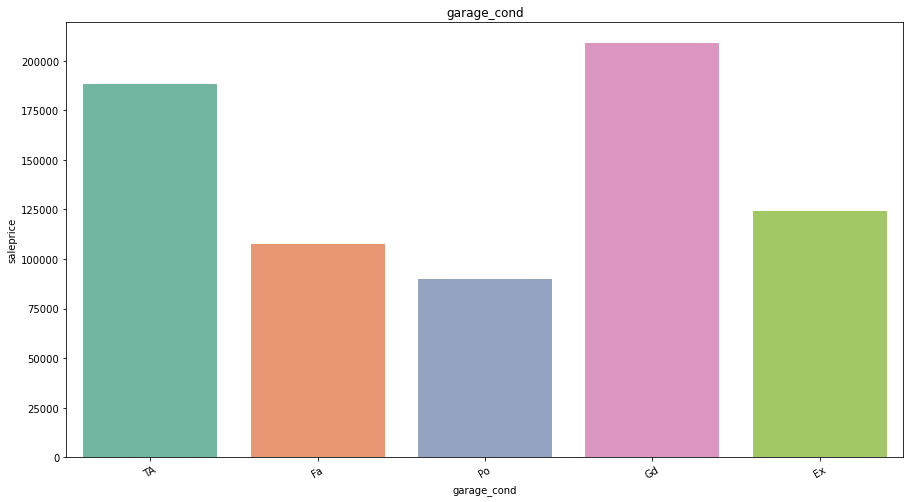

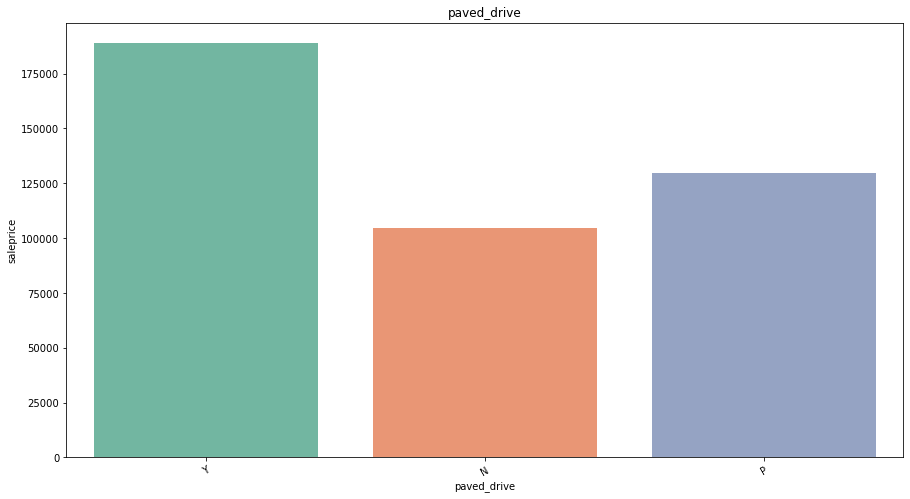

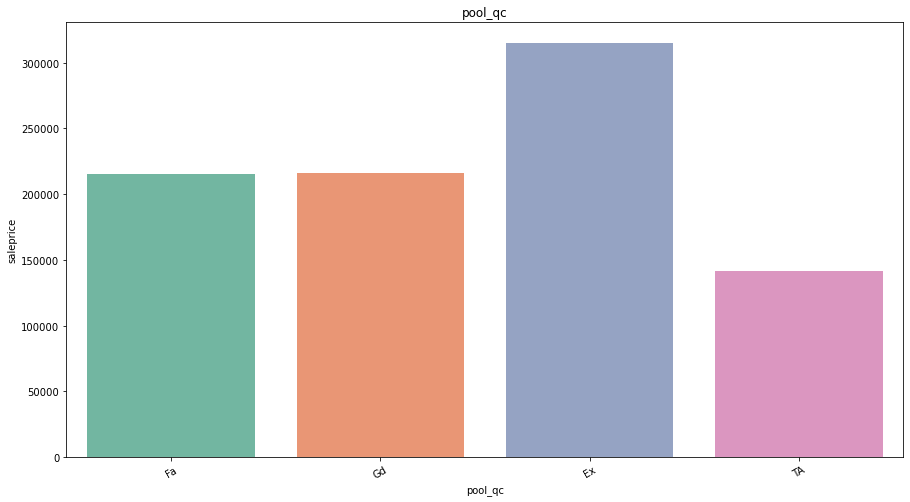

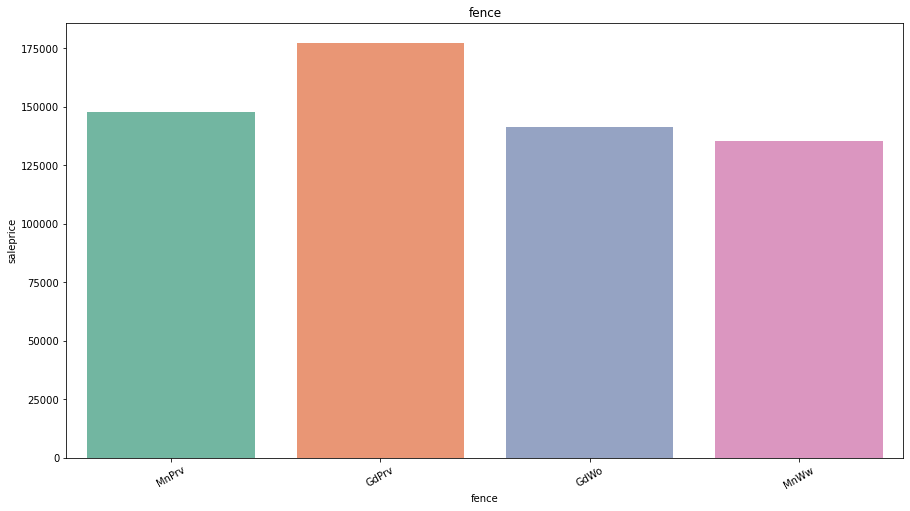

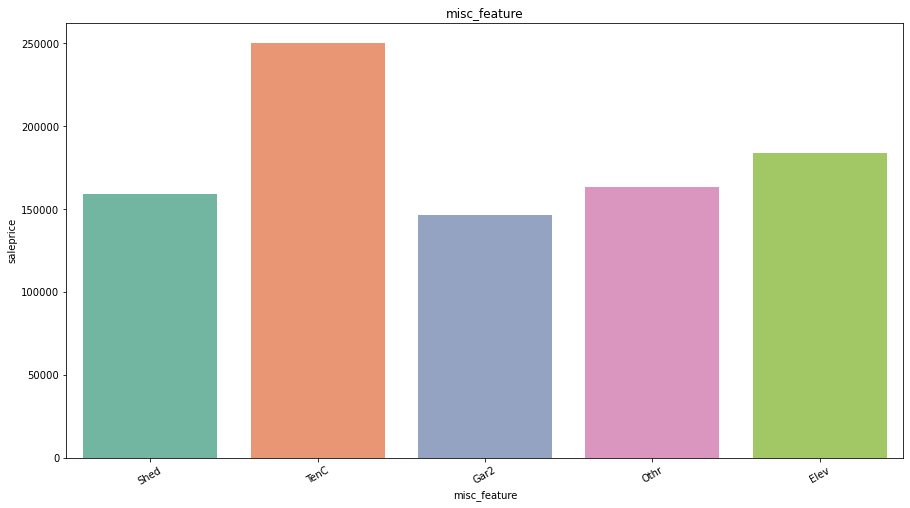

In [16]:
n=len(df1.columns)-1
for i in range(n):
    plt.figure(figsize=(15,8))
    ax=sns.barplot(x=df1.columns[i],y=train.saleprice,data=df1,palette="Set2",ci=None)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(df1.columns[i])
    plt.show()

The boxplot shows that there is relationship between categorical data with saleprice.

In [17]:
# Find the categorical null 
df1.isnull().sum().sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
garage_finish      114
garage_cond        114
garage_qual        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmtfin_type_1      55
bsmt_qual           55
mas_vnr_type        22
paved_drive          0
functional           0
kitchen_qual         0
electrical           0
central_air          0
heating_qc           0
heating              0
ms_zoning            0
street               0
condition_2          0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
bldg_type            0
foundation           0
house_style          0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
exter_qual           0
exter_cond           0
sale_type            0
dtype: int64

#### Handling missing categorical data 

<br> Note: There is NA option for all the cateogrical missing values.Pandas will recognize both empty cells and “NA” types as missing values thus it is important to cross check with their respective numerical values to verfiy if the missing data is a true NA


Text(0.5, 1.0, 'Barplot of Pool Area verus Pool QC')

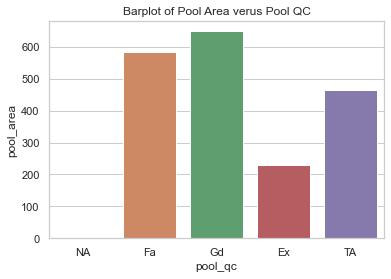

In [18]:
# Grouping pool related columns
# data set df_a
df_a=train[['pool_area','pool_qc']]
df_fill_test=df_a.copy()
df_fill_test['pool_qc'].fillna('NA',inplace=True)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="pool_qc", y="pool_area", data=df_fill_test,ci=None)
ax.set_title('Barplot of Pool Area verus Pool QC')

Text(0.5, 1.0, 'Barplot of misc val verus misc feature')

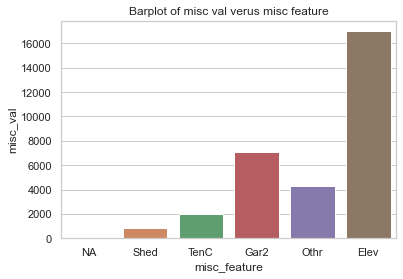

In [19]:
# Grouping all the misc columns
# data set df_b
df_b=train[['misc_feature','misc_val']]
df_fill_test=df_b.copy()
df_fill_test['misc_feature'].fillna('NA',inplace=True)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="misc_feature", y="misc_val", data=df_fill_test,ci=None)
ax.set_title('Barplot of misc val verus misc feature')

Text(0.5, 1.0, 'Barplot of fireplaces verus fireplace quality')

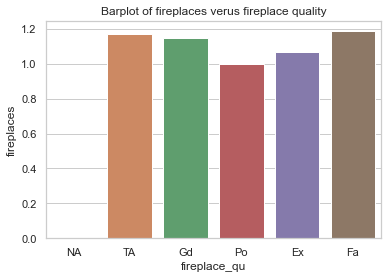

In [20]:
# Grouping all the fireplace columns
# data set df_b
df_c=train[['fireplace_qu','fireplaces']]
df_fill_test=df_c.copy()
df_fill_test['fireplace_qu'].fillna('NA',inplace=True)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="fireplace_qu", y="fireplaces", data=df_fill_test,ci=None)
ax.set_title('Barplot of fireplaces verus fireplace quality')

The bar plot shows that NA in categorical feature are due to non-existence. 
<br> Both alley and fence are independent variables, we assume that the null value is "NA" option. 


In [21]:
# Categorical Data 
# mas_vnr_type has options for "NA" as none
ordinal =['bsmt_cond','bsmt_qual','bsmt_exposure','bsmtfin_type_1',
          'bsmtfin_type_2','fireplace_qu','garage_finish','garage_qual',
          'garage_cond','garage_type','alley','fence','pool_qc',
          'misc_feature','mas_vnr_type','electrical']
df1_fill=df1.copy()
for x in ordinal:
    if x == 'mas_vnr_type':
        df1_fill[x].fillna('None',inplace=True)
    else: 
        df1_fill[x].fillna('NA',inplace=True)


In [22]:
df1_fill.isnull().sum()

ms_zoning         0
street            0
alley             0
lot_shape         0
land_contour      0
utilities         0
lot_config        0
land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
heating           0
heating_qc        0
central_air       0
electrical        0
kitchen_qual      0
functional        0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
paved_drive       0
pool_qc           0
fence             0
misc_feature      0
sale_type         0
dtype: int64

In [23]:
df1_fill.head()

ms_zoning street alley lot_shape land_contour utilities lot_config  \
0        RL   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1        RL   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2        RL   Pave    NA       Reg          Lvl    AllPub     Inside   
3        RL   Pave    NA       Reg          Lvl    AllPub     Inside   
4        RL   Pave    NA       IR1          Lvl    AllPub     Inside   

  land_slope neighborhood condition_1  ... fireplace_qu garage_type  \
0        Gtl       Sawyer        RRAe  ...           NA      Attchd   
1        Gtl      SawyerW        Norm  ...           TA      Attchd   
2        Gtl        NAmes        Norm  ...           NA      Detchd   
3        Gtl       Timber        Norm  ...           NA     BuiltIn   
4        Gtl      SawyerW        Norm  ...           NA      Detchd   

  garage_finish garage_qual garage_cond paved_drive pool_qc fence  \
0           RFn          TA          TA           Y      NA    NA   
1           RFn          TA          TA           Y      NA    NA   
2           Unf          TA          TA           Y      NA    NA   
3           Fin          TA          TA           Y      NA    NA   
4           Unf          TA          TA           N      NA    NA   

  misc_feature sale_type  
0           NA       WD   
1           NA       WD   
2           NA       WD   
3           NA       WD   
4           NA       WD   

[5 rows x 42 columns]

#### Numerical Data

In [24]:
df2 = df.select_dtypes(include=['float64', 'int64'])

In [25]:
df2.head()

id        pid  ms_subclass  lot_frontage  lot_area  overall_qual  \
0  109  533352170           60           NaN     13517             6   
1  544  531379050           60          43.0     11492             7   
2  153  535304180           20          68.0      7922             5   
3  318  916386060           60          73.0      9802             5   
4  255  906425045           50          82.0     14235             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  wood_deck_sf  \
0             8        1976            2005         289.0  ...             0   
1             5        1996            1997         132.0  ...             0   
2             7        1953            2007           0.0  ...             0   
3             5        2006            2007           0.0  ...           100   
4             8        1900            1993           0.0  ...             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   misc_val  mo_sold  yr_sold  saleprice  
0         0        3     2010     130500  
1         0        4     2009     220000  
2         0        1     2010     109000  
3         0        4     2010     174000  
4         0        3     2010     138500  

[5 rows x 39 columns]

In [26]:
df2.columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

In [27]:
# Ordinal and nominal variables in numerical data: 
nominal = df2['ms_subclass'].astype(str)
ordinal = df2[["overall_qual","overall_cond"]].astype(str)

- Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories is not known.
- Nominal data is a group of objects or ideas that can be collectively grouped on the basis of a particular characteristic

In this case, both nominal and ordinal variable will be considered as categorical data. 

In [28]:
# Combine ordinal and nominal columns in the categorical dataset
df1_fill = pd.concat([df1_fill,ordinal,nominal],axis=1)

In [29]:
df1_fill.shape

(2051, 45)

In [30]:
# Drop ordinal and nominal columns in the numerical dateset
df2_fill=df2.copy()
df2_fill.drop(['ms_subclass','overall_qual','overall_cond'],axis=1,inplace=True)

In [31]:
df2_fill.columns

Index(['id', 'pid', 'lot_frontage', 'lot_area', 'year_built', 'year_remod/add',
       'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd',
       'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold',
       'saleprice'],
      dtype='object')

In [32]:
# Convert numeric date/year variable to date/year scale
time_variables =['yr_sold','year_built','year_remod/add','garage_yr_blt','mo_sold']

for i in time_variables:
    if i=='mo_sold':
        pd.to_datetime(df2_fill[i],format='%M')
    else: 
        pd.to_datetime(df2_fill[i],format='%Y')

In [33]:
# Create another column for house age using year sold - year built
# Year can be used to determine House age at the point of time being sold

df2_fill['house_age']=df2_fill.apply(lambda row: row.yr_sold - row.year_built,axis=1)


<Figure size 432x288 with 0 Axes>

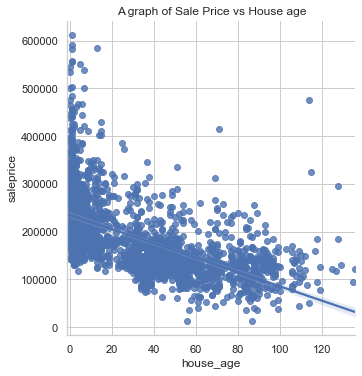

In [34]:
plt.figure(figsize=(6,4))
ax=sns.lmplot(x='house_age',y='saleprice',data=df2_fill)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('A graph of Sale Price vs House age')
plt.show()

#### Remarks: 
- The older the house age, the lower the saleprice

##### Relationship of the numerical variables and saleprice

In [35]:
n_discrete=['bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
       'bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars',
           'year_built','year_remod/add','mo_sold','yr_sold']

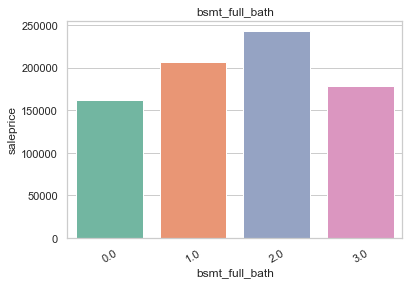

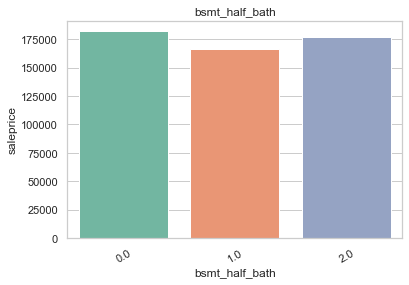

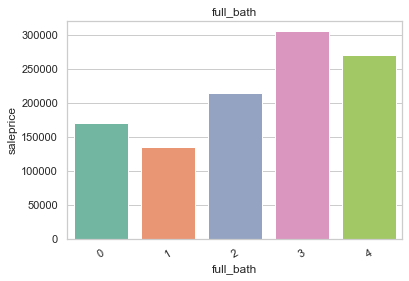

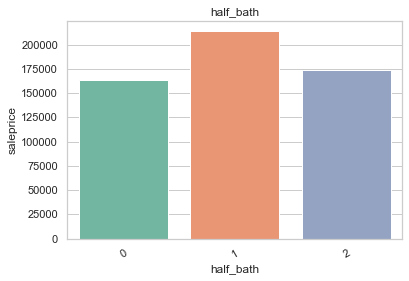

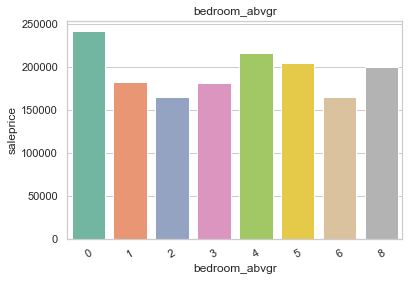

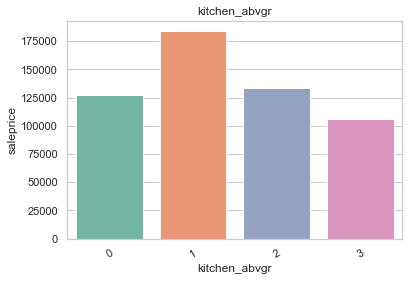

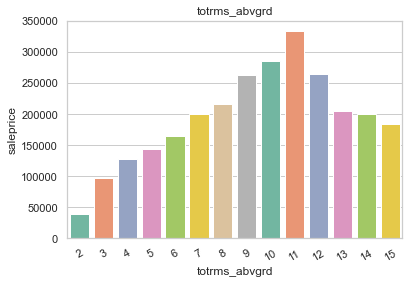

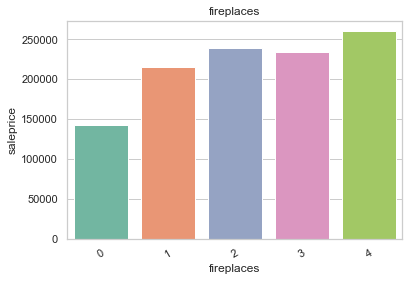

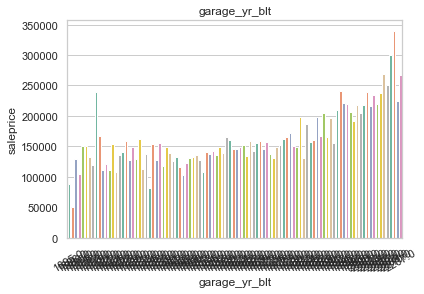

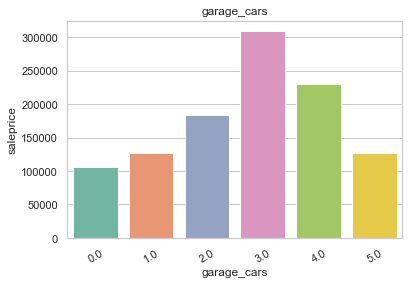

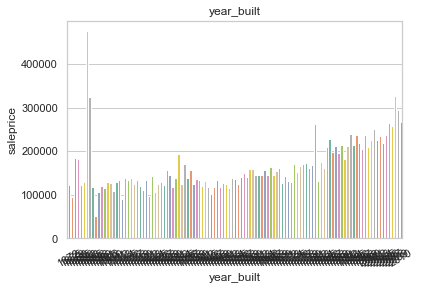

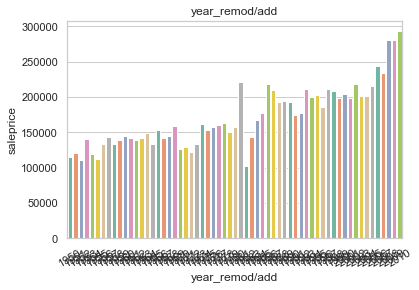

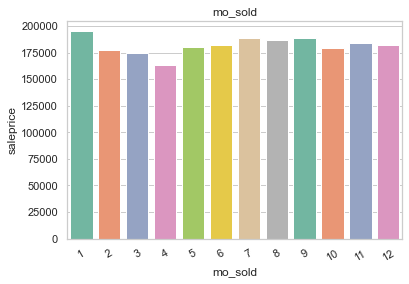

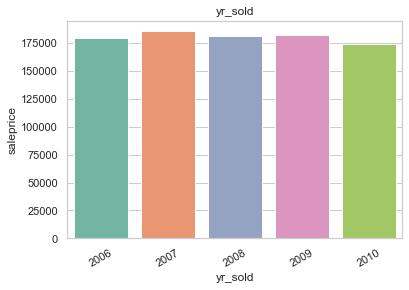

In [36]:
for i in n_discrete:
    plt.figure(figsize=(6,4))
    ax=sns.barplot(x=i,y='saleprice',data=df2_fill,palette="Set2",ci=None)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(i)
    plt.show()

The barplot shows that there is relationship between numerical discrete data with saleprice.

In [37]:
n_cont=[x for x in df2_fill.columns.values.tolist() if (x not in n_discrete)]
n_cont

['id',
 'pid',
 'lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'saleprice',
 'house_age']

In [38]:
len(n_cont)

23

#### To find the outliers in the continuous numerical data

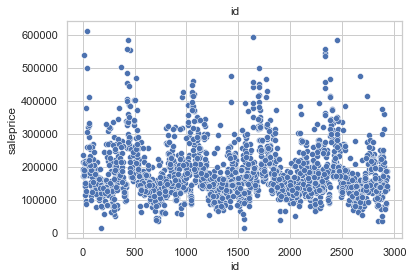

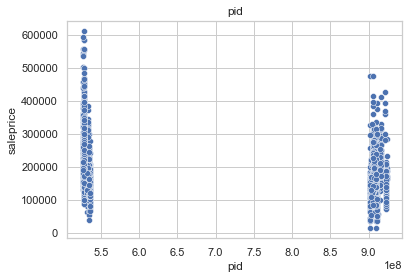

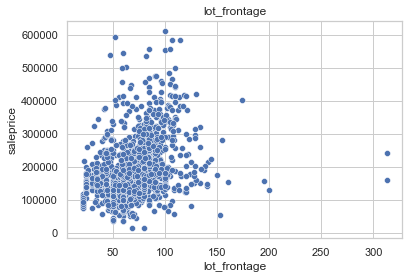

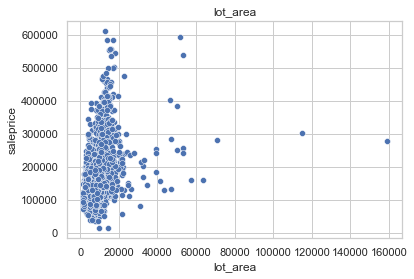

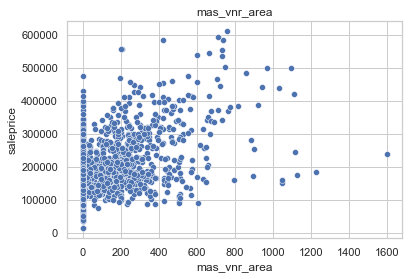

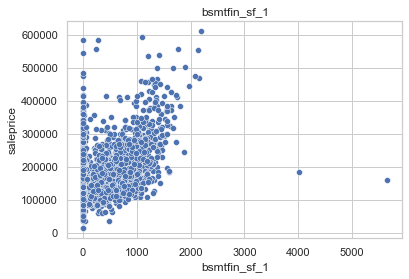

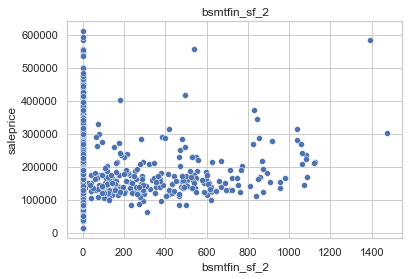

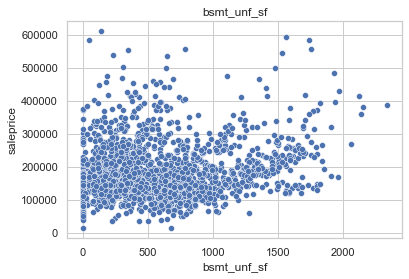

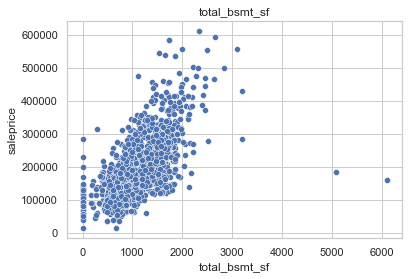

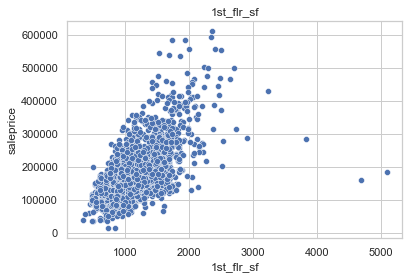

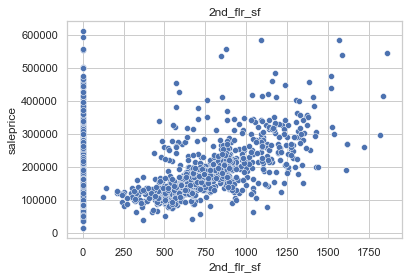

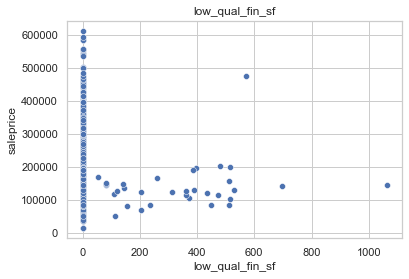

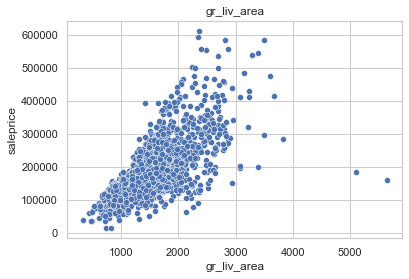

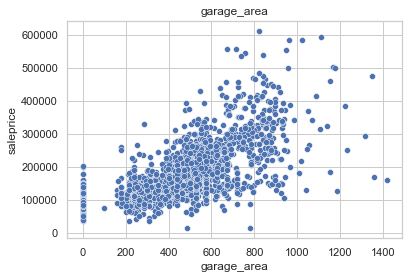

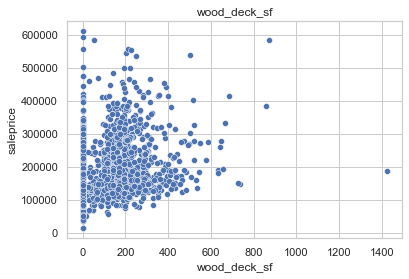

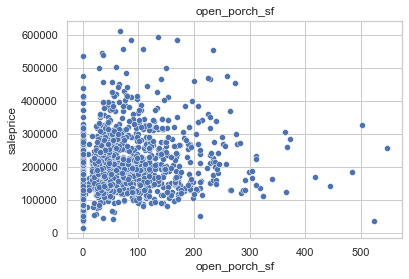

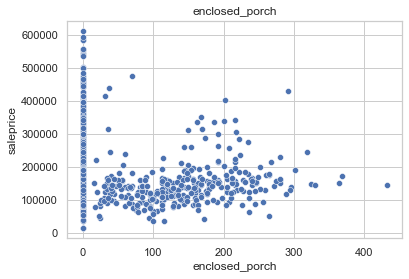

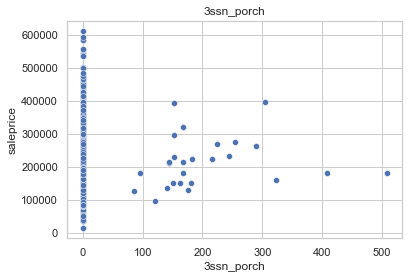

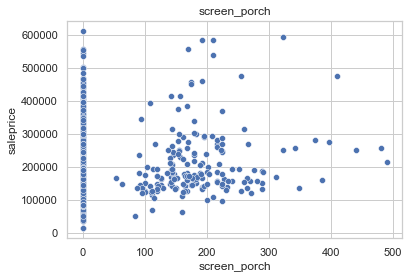

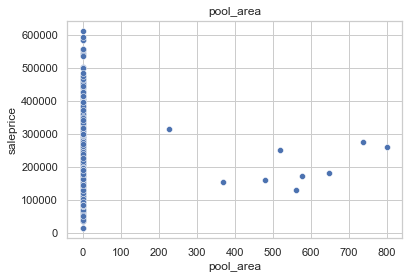

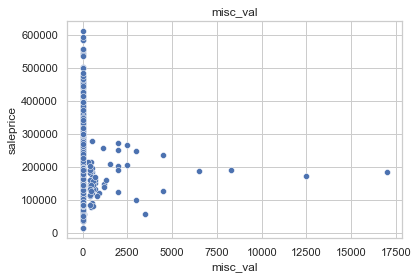

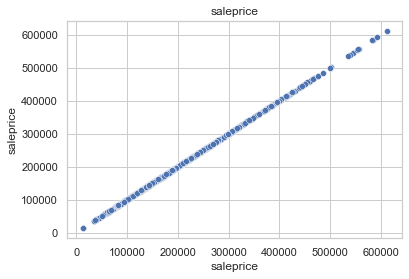

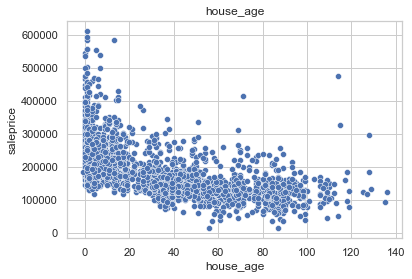

In [39]:
for i in n_cont:
    plt.figure(figsize=(6,4))
    ax=sns.scatterplot(x=i,y='saleprice',data=df2_fill,palette="Set2")
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(i)
    plt.show()

In [40]:
# Identifying outliers from scatterplot

temp= df2_fill[(df2_fill['lot_frontage']>300) | (df2_fill['lot_area']>100000) | (df2_fill['mas_vnr_area']>1400) |
   (df2_fill['bsmtfin_sf_1']>4000) | (df2_fill['bsmtfin_sf_2']>1200) | (df2_fill['total_bsmt_sf']>5000) |
    (df2_fill['1st_flr_sf']>4000) | (df2_fill['low_qual_fin_sf']>1000) | (df2_fill['gr_liv_area']>5000) |
    (df2_fill['wood_deck_sf']>1400) | (df2_fill['misc_val']>1000) | (df2_fill['saleprice']>400000) | (df2_fill['garage_yr_blt']>2200)].index

In [41]:
temp

Int64Index([  29,   41,   52,   81,  138,  150,  151,  155,  190,  253,  263,
             286,  304,  328,  332,  345,  361,  380,  465,  471,  480,  489,
             509,  526,  529,  623,  631,  685,  694,  700,  726,  765,  770,
             800,  823,  828,  934,  960,  966,  974,  986, 1035, 1058, 1081,
            1117, 1158, 1164, 1170, 1225, 1227, 1263, 1302, 1335, 1389, 1409,
            1503, 1542, 1592, 1610, 1624, 1639, 1647, 1671, 1692, 1699, 1700,
            1759, 1786, 1796, 1848, 1885, 1897, 1964, 1967, 2029, 2041],
           dtype='int64')

In [42]:
len(temp)

76

In [43]:
len(temp)/len(df2_fill)*100

3.7055095075572893

The identified outliers take up 3.7% of the total data; outliers to drop in both numerical and categorical data.

In [44]:
# drop same rows in numerical data 
df2_fill.drop(temp, axis=0,inplace=True)

In [45]:
# drop same row in categorical data
df1_fill.drop(temp, axis=0,inplace=True)

#### Handling missing numerical data

In [46]:
df2_fill.isnull().sum().sort_values(ascending=False)

lot_frontage       320
garage_yr_blt      113
mas_vnr_area        20
bsmt_full_bath       2
bsmt_half_bath       2
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
id                   0
3ssn_porch           0
screen_porch         0
pool_area            0
mo_sold              0
yr_sold              0
saleprice            0
misc_val             0
half_bath            0
fireplaces           0
totrms_abvgrd        0
kitchen_abvgr        0
bedroom_abvgr        0
pid                  0
full_bath            0
gr_liv_area          0
low_qual_fin_sf      0
2nd_flr_sf           0
1st_flr_sf           0
year_remod/add       0
year_built           0
lot_area             0
house_age            0
dtype: int64

#### Handling missing numerical data - lot frontage

In [47]:
# Grouping lot related columns
lot_data = np.where(train.columns.str.contains('lot'))

# showcase table
lot_data=train[train.columns[lot_data]]

In [48]:
pd.set_option('display.max_rows', 330)
lot_data[lot_data['lot_frontage'].isnull()]

lot_frontage  lot_area lot_shape lot_config
0              NaN     13517       IR1    CulDSac
7              NaN     12160       IR1     Inside
8              NaN     15783       Reg     Inside
23             NaN      7980       IR1     Inside
27             NaN     11700       IR1     Inside
31             NaN     11435       IR1     Corner
42             NaN      9101       IR1     Corner
50             NaN      2998       Reg     Inside
59             NaN     15038       IR2     Corner
62             NaN     20062       IR1     Inside
71             NaN     23730       IR2     Inside
75             NaN      6291       IR1     Inside
76             NaN     17529       Reg     Inside
90             NaN     11104       IR1     Inside
91             NaN     15295       IR3     Corner
94             NaN     14112       IR1     Corner
106            NaN      2651       Reg        FR2
108            NaN     39384       IR1    CulDSac
111            NaN     12342       IR1     Inside
114            NaN      9000       Reg     Corner
117            NaN      4765       IR1     Inside
118            NaN     10532       Reg     Corner
122            NaN      9945       IR1     Inside
125            NaN     24572       IR1    CulDSac
141            NaN      8658       IR1     Inside
142            NaN      6897       IR1     Corner
148            NaN      8826       Reg     Inside
150            NaN     10710       Reg     Inside
160            NaN     25339       Reg     Inside
161            NaN      8883       IR1     Inside
166            NaN      5700       Reg     Inside
169            NaN      7400       IR1    CulDSac
176            NaN      7861       IR1     Inside
177            NaN     11616       Reg     Inside
192            NaN      9819       IR1     Inside
200            NaN      1533       Reg     Inside
208            NaN      3196       Reg     Inside
210            NaN     11241       IR1    CulDSac
221            NaN     10659       IR1     Inside
223            NaN     13500       Reg     Inside
226            NaN      4500       Reg        FR2
236            NaN     22002       Reg     Corner
250            NaN     11929       IR1    CulDSac
253            NaN     11423       Reg     Inside
262            NaN     17979       IR1     Corner
268            NaN      7050       Reg     Inside
284            NaN      9125       IR1     Inside
285            NaN     11075       Reg     Corner
290            NaN     11836       IR1     Corner
293            NaN      4426       Reg     Inside
295            NaN      2887       Reg     Inside
309            NaN      5814       IR1    CulDSac
310            NaN     14860       IR2    CulDSac
311            NaN     14803       IR1    CulDSac
320            NaN     12358       IR1     Inside
327            NaN      4928       IR1     Inside
328            NaN     12692       IR1     Inside
333            NaN     11888       IR1     Inside
334            NaN      7082       Reg     Inside
335            NaN      8755       IR1        FR2
337            NaN     32463       Reg     Inside
339            NaN      3696       Reg     Inside
346            NaN     10246       IR1    CulDSac
370            NaN     12700       IR1     Inside
372            NaN      8638       IR1     Inside
375            NaN     12774       Reg     Inside
389            NaN     12328       IR1     Inside
403            NaN      2117       Reg     Inside
411            NaN      7917       IR1     Corner
416            NaN      8885       IR1     Inside
428            NaN     15896       IR2    CulDSac
430            NaN      5105       IR2        FR2
435            NaN      9556       IR1     Corner
444            NaN      7472       IR1    CulDSac
446            NaN     11717       IR1     Inside
452            NaN      8014       IR1    CulDSac
453            NaN     12250       IR1     Inside
454            NaN      2403       IR1        FR2
463            NaN      9763       IR1     Inside
469   

#### Remarks:
1. lot_frontage null values are not true null as the lot related columns suggested that lot_frontage existed for the house. 
2. Median values are chosen to fill up the null to avoid overfitting
3. Assumption: Data is missing completely at random (MCAR)

In [49]:
# Fill null values with median
median_lot=np.median(df2['lot_frontage'].dropna())
df2_fill['lot_frontage'].fillna(median_lot,inplace=True)

#### Handling missing numerical data - garage year built

In [50]:
# Grouping all the garage columns
train[(df1_fill['garage_type']  == 'NA') & (df2['garage_yr_blt'].isnull())]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
28    2243  911103060          190   C (all)          75.0      8250   Pave   
53     330  923226250          160        RM          21.0      1476   Pave   
65    2278  923202134           20        RL          70.0      8402   Pave   
79    2235  910201050           50        RM          50.0      7288   Pave   
101   2084  905476170           30        RL          58.0      9098   Pave   
103    728  902477130           30   C (all)          72.0      9392   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
120   1492  908127120           30        RL          63.0     13907   Pave   
134   1514  909100170           30        RL          67.0      5604   Pave   
136    216  905101100           50        RL          54.0      6342   Pave   
139    204  903426200           70        RM          60.0     12900   Pave   
162    754  903430070           90        RM          50.0      3000   Pave   
235    698  902105060           70        RM          90.0      9900   Pave   
256   2745  905477010           20        RL          77.0      8335   Pave   
260    131  534451150           30        RL          55.0      5350   Pave   
264    615  534450150           30        RL          50.0      5330   Pave   
276   2824  908130020           20        RL          75.0      8050   Pave   
334   2846  909131125          190        RH           NaN      7082   Pave   
356    943  911103050           50   C (all)         105.0      8470   Pave   
382    753  903430060           75        RM          92.0      5520   Pave   
406   2369  527451200          160        RM          21.0      1680   Pave   
409   2034  903454010           70        RM          60.0      6882   Pave   
426   2882  911175440          190   C (all)          50.0      9000   Pave   
437   1501  908201100           90        RL          65.0      6040   Pave   
445   2635  535478110          190        RL          70.0      7000   Pave   
457   1951  535379110           70        RL          60.0     10800   Pave   
486   1318  902328040           75        RM          35.0      6300   Pave   
530    900  908275040           90        RL          65.0     10926   Pave   
542   1376  904351280          190        RL          62.0     10106   Pave   
555   1366  903458110           50        RM           NaN      7920   Pave   
562    187  902401060          190        RM         100.0      9045   Pave   
579    218  905101310           90        RL          72.0     10778   Pave   
580   1504  908204160           90        RL          74.0      6845   Pave   
612   2670  902456015           50   C (all)          63.0      4761   Pave   
636   2174  908127100           90        RL          81.0     11841   Grvl   
653   1417  905480150           50        RL          60.0      9600   Pave   
663   2187  908225310           90        RL          52.0      8741   Pave   
689   1415  905477050          190        RL          70.0      7000   Pave   
692   2883  911225110           50   C (all)          60.0      8520   Grvl   
705   1292  902109080          190        RM          63.0     11426   Pave   
708   2875  910203100           30        RM          61.0      8534   Pave   
722   1135  531375050           20        RL          63.0     13072   Pave   
736    172  902106130           30        RM          56.0      4485   Pave   
741   2471  531363080           20        RL          74.0      7733   Pave   
783   2621  535450180           50        RL          60.0     10800   Pave   
787   1600  923228080          160        RM          21.0      1477   Pave   
791    763  904301060           90        RL          60.0     10800   Pave   
814   1515  909101060           30        RL          45.0      8248   Pave   
822   1516  909101180          190        RL          55.0      5687   Pave   
824   1808  531363040           20        RL          63.0

#### Remarks: 
1. 112 out of 113 null values in garage_yr_built is true 0.
2. Fill null with 0


In [51]:
# Fill null values with 0
df2_fill['garage_yr_blt'].fillna(0,inplace=True)

#### Handling missing numerical data - Masonry veneer area

In [52]:
train[(df1_fill['mas_vnr_type']  == 'None') & (df2['mas_vnr_area'].isnull())]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
86     539  531371050           20        RL          67.0     10083   Pave   
212    518  528458020           20        FV          90.0      7993   Pave   
276   2824  908130020           20        RL          75.0      8050   Pave   
338   1800  528458150           60        FV         112.0     12217   Pave   
431   1455  907251090           60        RL          75.0      9473   Pave   
451   1120  528439010           20        RL          87.0     10037   Pave   
591   1841  533208040          120        FV          35.0      4274   Pave   
844   1840  533208030          120        FV          30.0      5330   Pave   
913   2230  909475070           20        RL           NaN     32668   Pave   
939   1123  528462040           20        FV          95.0     11639   Pave   
1025  1784  528435010           20        RL          85.0      9965   Pave   
1244   485  528275160           60        RL           NaN     12891   Pave   
1306  1752  528250010           80        RL           NaN     11950   Pave   
1430  1185  534104100           60        FV           NaN      7500   Pave   
1434  1128  528480160           60        FV          65.0      8125   Pave   
1606  1096  528290090           60        RL           NaN      7750   Pave   
1815  2456  528429100           20        RL          49.0     15218   Pave   
1820  1728  528218010           60        RL          59.0     15810   Pave   
1941    56  528240070           60        RL           NaN      7851   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
22     NaN       IR1          Lvl  ...            0         0     NaN   NaN   
86     NaN       Reg          Lvl  ...            0         0     NaN   NaN   
212    NaN       IR1          Lvl  ...            0         0     NaN   NaN   
276    NaN       Reg          Lvl  ...            0         0     NaN   NaN   
338    NaN       IR1          Lvl  ...            0         0     NaN   NaN   
431    NaN       Reg          Lvl  ...            0         0     NaN   NaN   
451    NaN       Reg          Lvl  ...            0         0     NaN   NaN   
591   Pave       IR1          Lvl  ...            0         0     NaN   NaN   
844   Pave       IR2          Lvl  ...            0         0     NaN   NaN   
913    NaN       IR1          Lvl  ...            0         0     NaN   NaN   
939    NaN       Reg          Lvl  ...            0         0     NaN   NaN   
1025   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
1244   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
1306   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
1430   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
1434   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
1606   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
1815   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
1820   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
1941   NaN       Reg          Lvl  ...            0         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
22            NaN        0       7    2006        New     344133  
86            NaN        0       8    2009        WD      184900  
212           NaN        0      10    2009        New     225000  
276           NaN        0       4    2006        WD      117250  
338           NaN        0      12    2007        New     310013  
431           NaN        0       3    2008        WD      237000  
451           NaN        0       8    2008        WD      247000  
591           NaN        0      11    2007        New     199900  
844           NaN        0       7    2007        New     207500  
913           NaN 

#### Remarks: 
1. All null values in mas_vnr_area is true 0.
2. Fill null with 0

In [53]:
df2_fill['mas_vnr_area'].fillna(0,inplace=True)

#### Handling missing numerical data - the rest

In [54]:
df2_fill.isnull().sum()

id                 0
pid                0
lot_frontage       0
lot_area           0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       1
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     2
bsmt_half_bath     2
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        1
garage_area        1
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
house_age          0
dtype: int64

In [55]:
# To find the sum of the null value left
sum(df2_fill.isnull().sum())

10

In [56]:
len(df2_fill)

1975

In [57]:
# To find the % of null in numerical
round((sum(df2_fill.isnull().sum())/len(df2) * 100),1)

0.5

The rest of the missing data take up about 0.5% of the data. As majority of the null values are being filled up with 0, thus the same will go for the minority group of the null values. 

In [58]:
df2_fill.fillna(0,inplace=True)

In [59]:
df2_fill.isnull().sum()

id                 0
pid                0
lot_frontage       0
lot_area           0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
house_age          0
dtype: int64

##### To check variable distribution for numerical

* linear regression analysis requires all variables to be multivariate normal. 
* This assumption can best be checked with a histogram and it shows that numerical variables are skewed.
* When the data is not normally distributed, a non-linear transformation (e.g., log-transformation) might fix this issue.

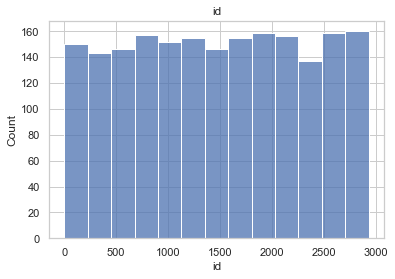

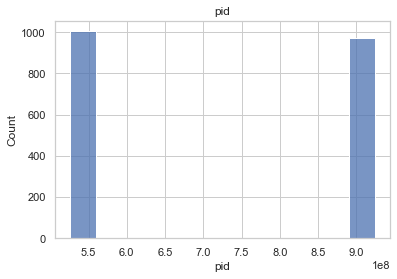

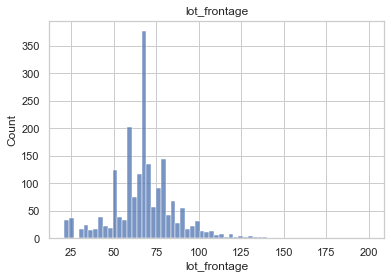

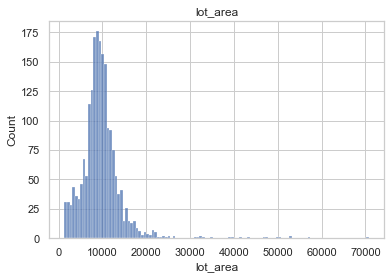

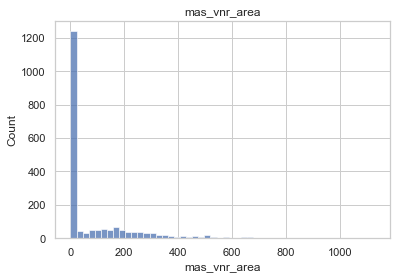

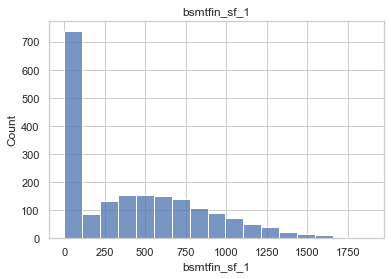

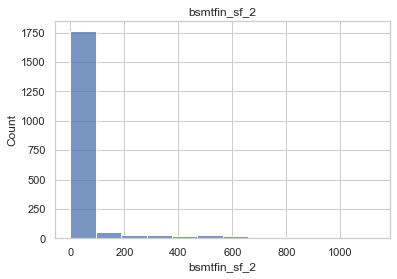

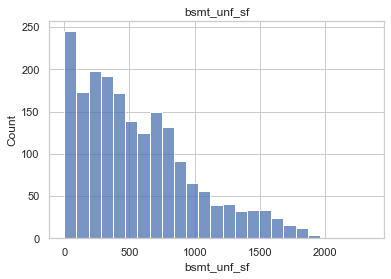

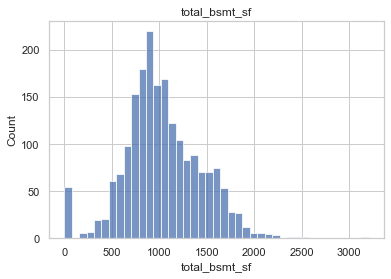

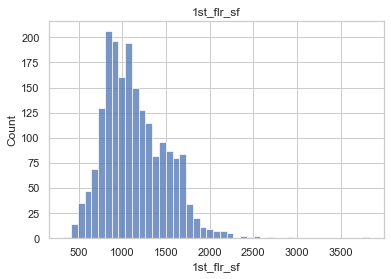

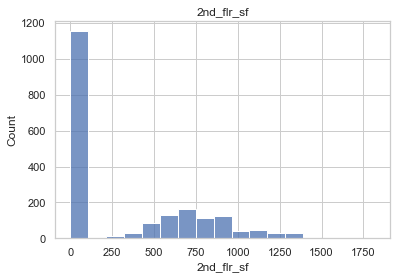

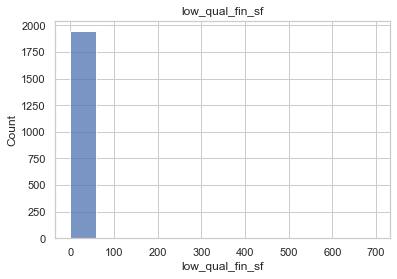

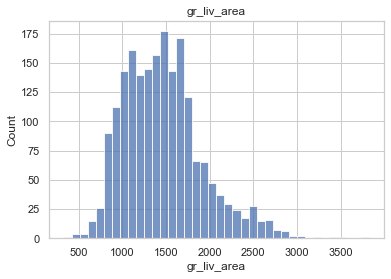

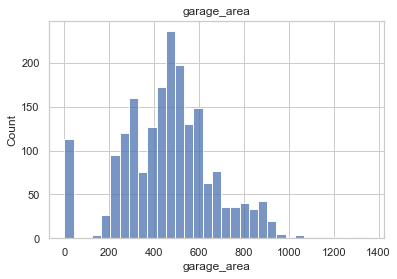

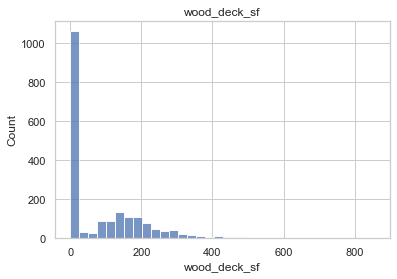

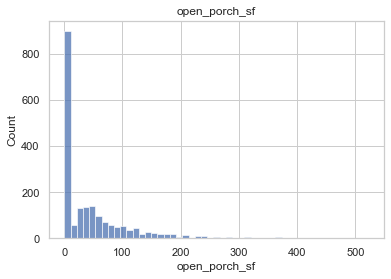

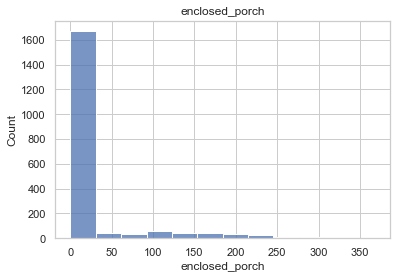

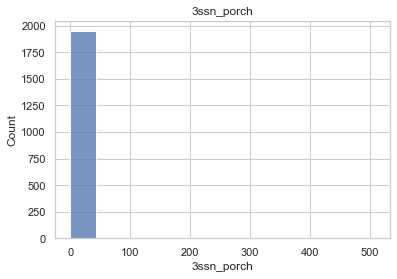

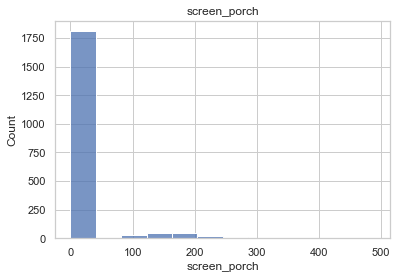

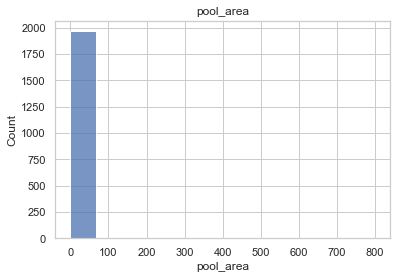

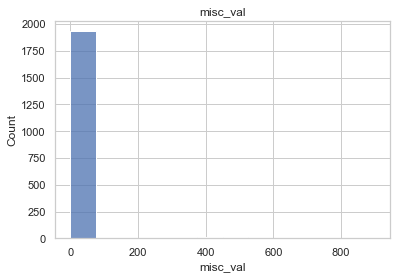

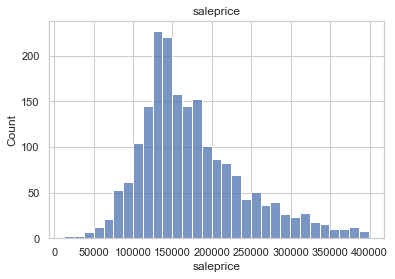

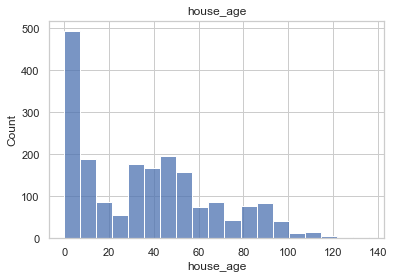

In [60]:
for i in n_cont:
    plt.figure(figsize=(6,4))
    ax=sns.histplot(x=i,data=df2_fill,palette="Set2")
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(i)
    plt.show()

In [61]:
# lot area, 1st floor sf and gr liv area are skewed 
log_num=['lot_area','1st_flr_sf','gr_liv_area']

e = 1e-4
for x in log_num:
    df2_fill[x]=np.log(df2_fill[x]+e)

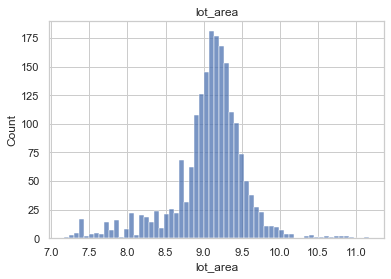

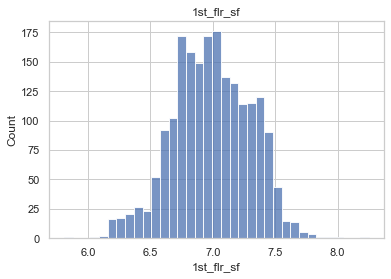

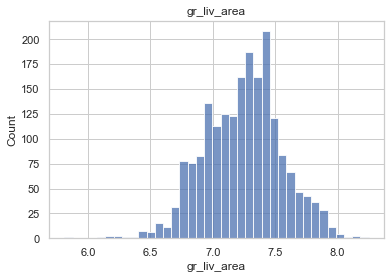

In [62]:
for i in log_num:
    data=df2_fill
    plt.figure(figsize=(6,4))
    ax=sns.histplot(x=i,data=df2_fill,palette="Set2")
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(i)
    plt.show()

In [63]:
df2_fill.shape

(1975, 37)

## Now the categorical and numerical dataset are ready to be combined. 

- However, it is also important that the train and test dataset should have the same column names after get_dummies. 

Therefore, we will proceed to clean test data the same way as train data. Also to force both train and test categorical columns to have the same column names.

## Kaggle challenge - Test data processing

In [64]:
test = pd.read_csv('../data/test.csv')
test.columns = test.columns.str.lower().str.replace(' ', '_')
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area pool_qc  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  fence misc_feature misc_val mo_sold  yr_sold  sale_type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [65]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [66]:
# Check for discrepancy in columns name between train and test dataset
train_cols = train.columns
test_cols = test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

print ("1.", common_cols)
print("2.",train_not_test)

1. Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

In [67]:
df_test=test.copy()

In [68]:
# Check for null values
df_test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [69]:
# Split into Categorical: 
df_test1 = df_test.select_dtypes(include=['object'])

# Split into Numerical:
df_test2 = df_test.select_dtypes(include=['float64', 'int64'])

### Handling TEST categorical data 

In [70]:
# Categorical Data 
# mas_vnr_type has options for "NA" as none
ordinal =['bsmt_cond','bsmt_qual','bsmt_exposure','bsmtfin_type_1',
          'bsmtfin_type_2','fireplace_qu','garage_finish','garage_qual',
          'garage_cond','garage_type','alley','fence','pool_qc',
          'misc_feature','mas_vnr_type','electrical']
df_test1_fill=df_test1.copy()
for x in ordinal:
    if x == 'mas_vnr_type':
        df_test1_fill[x].fillna('None',inplace=True)
    else: 
        df_test1_fill[x].fillna('NA',inplace=True)

In [71]:
df_test1_fill.isnull().sum()

ms_zoning         0
street            0
alley             0
lot_shape         0
land_contour      0
utilities         0
lot_config        0
land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
heating           0
heating_qc        0
central_air       0
electrical        0
kitchen_qual      0
functional        0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
paved_drive       0
pool_qc           0
fence             0
misc_feature      0
sale_type         0
dtype: int64

In [72]:
df_test1_fill.shape

(878, 42)

In [73]:
# Ordinal and nominal variables in numerical data are categorical data: 
nominal = df_test2['ms_subclass'].astype(str)
ordinal = df_test2[["overall_qual","overall_cond"]].astype(str)
df_test1_fill = pd.concat([df_test1_fill,ordinal,nominal],axis=1)

In [74]:
# Drop ordinal and nominal columns in the numerical dateset
df_test2_fill=df_test2.copy()
df_test2_fill.drop(['ms_subclass','overall_qual','overall_cond'],axis=1,inplace=True)

In [75]:
# To have the same get_dummies columns for both train and test datasets 
one_hot_encoded_training_predictors=pd.get_dummies(df1_fill)
one_hot_encoded_test_predictors=pd.get_dummies(df_test1_fill)
final_train,final_test=one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                join='left',
                                                                axis=1)

In [76]:
# This is the categorical columns for train dataset after get_dummies
final_train

ms_zoning_A (agr)  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  \
0                     0                  0             0                  0   
1                     0                  0             0                  0   
2                     0                  0             0                  0   
3                     0                  0             0                  0   
4                     0                  0             0                  0   
...                 ...                ...           ...                ...   
2046                  0                  0             0                  0   
2047                  0                  0             0                  0   
2048                  0                  0             0                  0   
2049                  0                  0             0                  0   
2050                  0                  0             0                  0   

      ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  street_Grvl  street_Pave  \
0                0             1             0            0            1   
1                0             1             0            0            1   
2                0             1             0            0            1   
3                0             1             0            0            1   
4                0             1             0            0            1   
...            ...           ...           ...          ...          ...   
2046             0             1             0            0            1   
2047             0             1             0            0            1   
2048             0             1             0            0            1   
2049             0             1             0            0            1   
2050             0             1             0            0            1   

      alley_Grvl  ...  ms_subclass_30  ms_subclass_40  ms_subclass_45  \
0              0  ...               0               0               0   
1              0  ...               0               0               0   
2              0  ...               0               0               0   
3              0  ...               0               0               0   
4              0  ...               0               0               0   
...          ...  ...             ...             ...             ...   
2046           0  ...               0               0               0   
2047           0  ...               1               0               0   
2048           0  ...               0               0               0   
2049           0  ...               0               0               0   
2050           0  ...               0               0               0   

      ms_subclass_50  ms_subclass_60  ms_subclass_70  ms_subclass_75  \
0                  0               1               0               0   
1                  0               1               0               0   
2                  0               0               0               0   
3                  0               1               0               0   
4                  1               0               0               0   
...              ...             ...             ...             ...   
2046               0               0               0               0   
2047               0               0               0               0   
2048               1               0               0               0   
2049               0               0               0               0   
2050               0               1               0               0   

      ms_subclass_80  ms_subclass_85  ms_subclass_90  
0                  0               0               0  
1                  0               0               0  
2                  0               0               0  
3                  0               0               0  
4                  0               0               0  
...              ...             ...             ...  
2046             

In [77]:
# This is the categorical columns for test dataset after get_dummies
final_test

ms_zoning_A (agr)  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  \
0                  NaN                  0             0                  0   
1                  NaN                  0             0                  0   
2                  NaN                  0             0                  0   
3                  NaN                  0             0                  0   
4                  NaN                  0             0                  0   
..                 ...                ...           ...                ...   
873                NaN                  0             0                  0   
874                NaN                  0             0                  0   
875                NaN                  0             0                  0   
876                NaN                  0             0                  0   
877                NaN                  0             0                  0   

     ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  street_Grvl  street_Pave  \
0               0             0             1            0            1   
1               0             1             0            0            1   
2               0             1             0            0            1   
3               0             0             1            0            1   
4               0             1             0            0            1   
..            ...           ...           ...          ...          ...   
873             0             1             0            0            1   
874             0             1             0            0            1   
875             0             1             0            0            1   
876             0             1             0            0            1   
877             0             1             0            0            1   

     alley_Grvl  ...  ms_subclass_30  ms_subclass_40  ms_subclass_45  \
0             1  ...               0               0               0   
1             0  ...               0               0               0   
2             0  ...               0               0               0   
3             0  ...               1               0               0   
4             0  ...               0               0               0   
..          ...  ...             ...             ...             ...   
873           0  ...               0               0               0   
874           0  ...               0               0               0   
875           0  ...               0               0               0   
876           0  ...               0               0               0   
877           0  ...               0               0               0   

     ms_subclass_50  ms_subclass_60  ms_subclass_70  ms_subclass_75  \
0                 0               0               0               0   
1                 0               0               0               0   
2                 0               1               0               0   
3                 0               0               0               0   
4                 0               0               0               0   
..              ...             ...             ...             ...   
873               0               1               0               0   
874               0               1               0               0   
875               0               0               0               0   
876               0               0               0               0   
877               0               0               0               0   

     ms_subclass_80  ms_subclass_85  ms_subclass_90  
0                 0               0               0  
1                 0               0               1  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0  
..              ...             ...             ...  
873               0               0               0  
874              

#### Remarks: 

* Both train and test categorical have the same no of columns and name.

### Handling Test numerical data 

In [78]:
df_test2.isnull().sum()

id                   0
pid                  0
ms_subclass          0
lot_frontage       160
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
mas_vnr_area         1
bsmtfin_sf_1         0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       0
bsmt_half_bath       0
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt       45
garage_cars          0
garage_area          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
dtype: int64

In [79]:
df_test2.shape

(878, 38)

In [80]:
# Fill up null values for Nurmerical

for x in df_test2_fill.columns:
    if x == 'lot_frontage':
        median_lot=np.median(df_test2_fill['lot_frontage'].dropna())
        df_test2_fill[x].fillna(median_lot,inplace=True)
    else:
        df_test2_fill[x].fillna(0, inplace=True)

In [81]:
log_num=['lot_area','1st_flr_sf','gr_liv_area']

e = 1e-4
for x in log_num:
    df_test2_fill[x]=np.log(df_test2_fill[x]+e)

In [82]:
# Convert numerical year to year on year scale
pd.to_datetime(df_test2_fill.yr_sold, format='%Y')
pd.to_datetime(df_test2_fill.year_built, format='%Y')

df_test2_fill['house_age']=df_test2_fill['yr_sold']-df_test2_fill['year_built']

In [83]:
df_test2_fill.shape

(878, 36)

### Combine Categorical and Numerical for TEST dataset

In [84]:
df_X_test=pd.concat([final_test,df_test2_fill],axis=1)

In [85]:
# Do a check on the shape to make sure that there is no data leakage
# Numerical columns: 36
# Categorical columns : 296 
# No of rows: 878
df_X_test.shape

(878, 332)

In [86]:
# Do a check on the null values
pd.options.display.max_rows = 4000
df_X_test.isnull().sum()

ms_zoning_A (agr)       878
ms_zoning_C (all)         0
ms_zoning_FV              0
ms_zoning_I (all)         0
ms_zoning_RH              0
ms_zoning_RL              0
ms_zoning_RM              0
street_Grvl               0
street_Pave               0
alley_Grvl                0
alley_NA                  0
alley_Pave                0
lot_shape_IR1             0
lot_shape_IR2             0
lot_shape_IR3             0
lot_shape_Reg             0
land_contour_Bnk          0
land_contour_HLS          0
land_contour_Low          0
land_contour_Lvl          0
utilities_AllPub          0
utilities_NoSeWa        878
utilities_NoSewr          0
lot_config_Corner         0
lot_config_CulDSac        0
lot_config_FR2            0
lot_config_FR3            0
lot_config_Inside         0
land_slope_Gtl            0
land_slope_Mod            0
land_slope_Sev            0
neighborhood_Blmngtn      0
neighborhood_Blueste      0
neighborhood_BrDale       0
neighborhood_BrkSide      0
neighborhood_ClearCr

#### Remarks: 
The null values in the test dataset suggested that the option is not found in the test dataset. 
<br>As test data is forced to have the same hot encoded variables as train dataset, it creates 25 empty columns with 878 null values. 
<br>In this case, as they do not exist, it will be filled up with 0.

In [87]:
df_X_test.fillna(0, inplace=True)

### Save TEST dataset

In [88]:
# Save clean test data
df_X_test.to_csv('../data/df_X_test.csv',index=False)

### Combine Categorical and Numerical for TRAIN dataset

Note:
- To combine numerical with hot-encoded variable for cateogrical

In [89]:
df_X=pd.concat([final_train,df2_fill],axis=1)

In [90]:
# Do a check on the shape to make sure that there is no data leakage
# Numerical columns: 37
# Categorical columns : 296 
# No of rows: 1975 (after dropping outliers)
df_X.shape

(1975, 333)

In [91]:
# Check for null values
df_X.isnull().sum()

ms_zoning_A (agr)       0
ms_zoning_C (all)       0
ms_zoning_FV            0
ms_zoning_I (all)       0
ms_zoning_RH            0
ms_zoning_RL            0
ms_zoning_RM            0
street_Grvl             0
street_Pave             0
alley_Grvl              0
alley_NA                0
alley_Pave              0
lot_shape_IR1           0
lot_shape_IR2           0
lot_shape_IR3           0
lot_shape_Reg           0
land_contour_Bnk        0
land_contour_HLS        0
land_contour_Low        0
land_contour_Lvl        0
utilities_AllPub        0
utilities_NoSeWa        0
utilities_NoSewr        0
lot_config_Corner       0
lot_config_CulDSac      0
lot_config_FR2          0
lot_config_FR3          0
lot_config_Inside       0
land_slope_Gtl          0
land_slope_Mod          0
land_slope_Sev          0
neighborhood_Blmngtn    0
neighborhood_Blueste    0
neighborhood_BrDale     0
neighborhood_BrkSide    0
neighborhood_ClearCr    0
neighborhood_CollgCr    0
neighborhood_Crawfor    0
neighborhood

In [92]:
df_X

ms_zoning_A (agr)  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  \
0                     0                  0             0                  0   
1                     0                  0             0                  0   
2                     0                  0             0                  0   
3                     0                  0             0                  0   
4                     0                  0             0                  0   
5                     0                  0             0                  0   
6                     0                  0             0                  0   
7                     0                  0             0                  0   
8                     0                  0             0                  0   
9                     0                  0             0                  0   
10                    0                  0             0                  0   
11                    0                  0             0                  0   
12                    0                  0             0                  0   
13                    0                  0             1                  0   
14                    0                  0             0                  0   
15                    0                  0             0                  0   
16                    0                  0             0                  0   
17                    0                  0             0                  0   
18                    0                  0             0                  0   
19                    0                  0             1                  0   
20                    0                  0             0                  0   
21                    0                  0             0                  0   
22                    0                  0             0                  0   
23                    0                  0             0                  0   
24                    0                  0             0                  0   
25                    0                  0             0                  0   
26                    0                  0             0                  0   
27                    0                  0             0                  0   
28                    0                  1             0                  0   
30                    0                  0             0                  0   
31                    0                  0             0                  0   
32                    0                  0             0                  0   
33                    0                  0             0                  0   
34                    0                  0             0                  0   
35                    0                  0             0                  0   
36                    0                  0             0                  0   
37                    0                  0             0                  0   
38                    0                  0             0                  0   
39                    0                  0             0                  0   
40                    0                  0             0                  0   
42                    0                  0             0                  0   
43                    0                  0             0                  0   
44                    0                  0             0                  0   
45                    0                  0             0                  0   
46                    0                  0             0                  0   
47                    0                  0             0                  0   
48                    0                  0             0                  0   
49                    0                  0             0                  0   
50                    0                  0             1                  0   
51                    0                  0             0

In [93]:
df_X.isnull().sum()

ms_zoning_A (agr)       0
ms_zoning_C (all)       0
ms_zoning_FV            0
ms_zoning_I (all)       0
ms_zoning_RH            0
ms_zoning_RL            0
ms_zoning_RM            0
street_Grvl             0
street_Pave             0
alley_Grvl              0
alley_NA                0
alley_Pave              0
lot_shape_IR1           0
lot_shape_IR2           0
lot_shape_IR3           0
lot_shape_Reg           0
land_contour_Bnk        0
land_contour_HLS        0
land_contour_Low        0
land_contour_Lvl        0
utilities_AllPub        0
utilities_NoSeWa        0
utilities_NoSewr        0
lot_config_Corner       0
lot_config_CulDSac      0
lot_config_FR2          0
lot_config_FR3          0
lot_config_Inside       0
land_slope_Gtl          0
land_slope_Mod          0
land_slope_Sev          0
neighborhood_Blmngtn    0
neighborhood_Blueste    0
neighborhood_BrDale     0
neighborhood_BrkSide    0
neighborhood_ClearCr    0
neighborhood_CollgCr    0
neighborhood_Crawfor    0
neighborhood

In [94]:
df_X.shape

(1975, 333)

### Save TRAIN dataset

In [95]:
df_X.to_csv('../data/df_X.csv',index=False)